https://blog.csdn.net/wang454592297/article/details/80336753

https://www.sfu.ca/~ssurjano/camel3.html

https://programmerclick.com/article/13428601/

In [18]:
!pip install pyswarms
!pip install pygad
;
import pygad
import pyswarms as ps

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
import random

In [20]:
random.seed(314592654)
function_inputs = [0,0]

In [21]:
def get_gradient_descent_3D(
                      pos_history,
                      func ,
                      title='Animation', 
                      limits = [(-1,1),(-1,1)], 
                      labels=['x-axis','y-axis','z-axis'], 
                      delta = 0.01,
                      mark = (0,0)):

    fig = plt.figure(figsize = (16,8))

    ax = fig.add_subplot(1, 1, 1, projection='3d')

    n_iters = len(pos_history)

    #datos del Plot
    
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    
    #Datos del grid/mesh
    xlim = limits[0]
    ylim = limits[1]
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)

    #datos para contorno ax
    xx, yy = np.meshgrid(x, y)

    zz = func((xx,yy))

    #Contorno
    ax.plot_surface(xx,yy,zz,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )

    #puntos
    
    ax.scatter(xs= pos_history[:,0], ys=pos_history[:,1], zs=pos_history[:,2],  color='black', marker='o')
    #marca
    ax.scatter(xs=mark[0], ys=mark[1], zs=mark[2], color="red", marker="x")
    
    ax.view_init(45, 220)
    plt.show()


In [22]:
def get_pos_animation(
                      pos_history,
                      func , 
                      limits = [(-1,1),(-1,1)], 
                      labels=['x-axis', 'y-axis','z-axis'],
                      levels = 50, 
                      delta = 0.01,
                      dot_color = "black",
                      mark = (0,0)):
    """
    get_pos_animation hace crea la animación 2D de los datos de pos_history, acepta 1 o varios puntos a la vez 
    para animar sus posiciones.
    :param pos_history: numpy array de posiciones de la/las particulas a animar.
    :param func: la función con la cuál se creará la el grid para la visualización en el plot.
    :param limits: Los límites entre los cuáles se graficará el plot. Predeterminado es [xlim=(-1,1),ylim=(-1,1)].
    :param labels: Los labels de los ejes X y Y para el plot. Predeterminado es 'x-axis' y 'y-axis'.
    :param delta: El espaciado entre los puntos para generar la maya dentro de los límites para el plot. Predeterminado es 0.01
                  Si xi = 0, xi+1 = 0.01, xi+2 = 0.02 ...
    :param levels: Niveles en el eje Z de la meshgrid.
    :param mark: La posición (x,y) de dónde ubicar un marcador importante para la optimización, en este caso el mínimo por ejemplo.
    :return: Objeto animation de la librería de matplotlib con la cantidad de frames igual a la cantidad de entradas de pos_history. 
    """

    
    fig,ax = plt.subplots(1,1)

    n_iters = len(pos_history)

    #datos del Plot
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    

    #Datos del grid/mesh
    xlim = limits[0]
    ylim = limits[1]
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)

    #datos para contorno ax
    xx, yy = np.meshgrid(x, y)

    xypairs = np.vstack([xx.reshape(-1), yy.reshape(-1)]).T
    z = np.array(list(map(func, list(xypairs))))
    zz = z.reshape(xx.shape)

    #Contorno
    ax.contour(xx,yy,zz, levels=levels)

    #marca
    ax.scatter(mark[0], mark[1], color="red", marker="x")

    plot = ax.scatter(x=[], y=[], c=dot_color, alpha=0.6)

    plotanim = animation.FuncAnimation(
            fig=fig,
            func=_animate,
            frames=range(n_iters),
            fargs=(pos_history,plot, ax),
            interval = 40,
            repeat = True,
            repeat_delay = None,
            blit = True
    )

    return plotanim


def _animate(i, data, plot, ax):
    
    ax.set_title("Paso "+ str(i+1))
    curr_pos = data[i]
    plot.set_offsets(curr_pos)
    return (plot,)



## Función de Griewank

In [23]:
import math
#Función de Griewank

def griewank(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado del fitness de x para la función. 
    """

    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

    fitness_y : float = -(100 * y)
    return fitness_y
    

In [24]:
import math
#Función de Griewank

def griewankSw(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado de x para la función. 
    """
    x = list((x.flatten()))
    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

    
    return y
    

In [25]:
import math
#Función de Griewank

def griewankDG(x, solution_idx = 0) -> float:
    """
    griewank calcula el resultado de la función de griewank para [x_1, x_2,..., x_d] con d siendo la cantidad de elementos de x. 
    :param x: d números reales entre [-600,600] en una lista. E.g [300,-300,150].
    :return: Resultado de x para la función. 
    """
    #x = list((x.flatten()))
    d : int = len(x)
    suma = 0
    prod = 1

    for i in range(1, d+1):
        xi = x[i-1]
        suma += xi**2 /4000
        prod *= math.cos(xi/math.sqrt(i))

    y : float = suma - prod + 1

        
    return y
    

In [26]:
def griewank_der_2D(x, solution_idx = 0) -> float:
    #x = list(x.flatten())
    
    if len(x) == 2:
        x1 = x[0] 
        x2 = x[1] 
        return np.array([x1/2000 + np.cos(0.707107 * x2) * np.sin(x1),
        0.0005 * (x2 + 1414.21 *  np.cos(x1) * np.sin(0.707107 * x2))])
    else:
        x1 = x[0] 
        x2 = x[1] 
        x3 = x[2]
        return np.array([x1/2000 + np.cos(0.707107 * x2) * np.cos(x3/np.sqrt(3)) * np.sin(x1) ,
        0.0005 * (x2 + 1414.21 * np.cos(x1) * np.cos(x3/np.sqrt(3)) * np.sin(0.707107 * x2)),
        x3/2000 + (np.cos(x1) * np.cos(0.707107 * x2) * np.sin(x3/np.sqrt(3)))/np.sqrt(3)])

In [27]:
def griewankNp(x) -> float:
    return np.array([x1/2000 + np.cos(0.707107 * x2) * np.cos(x3/np.sqrt(3)) * np.sin(x1) ,
        0.0005 * (x2 + 1414.21 * np.cos(x1) * np.cos(x3/np.sqrt(3)) * np.sin(0.707107 * x2)),
        x3/2000 + (np.cos(x1) * np.cos(0.707107 * x2) * np.sin(x3/np.sqrt(3)))/np.sqrt(3)])

In [151]:
griewankDG([-3.09437204,  4.12248276,  0.59673636])

0.09057099912310762

### Descenso por gradiente

In [28]:
def gradient_descent(vector, funcDer,Lrate, epsilon=0.00132, max_iteraton=10000): 
    punto = np.array(vector)

    arrayPuntos = list()

    for iteration in range(max_iteraton):

        arrayPuntos.append(punto)

        punto = punto - Lrate * funcDer(punto)

        if np.linalg.norm(funcDer(punto)) < epsilon:
            return arrayPuntos, punto, iteration+1,

    return arrayPuntos, punto, max_iteraton

learnRate = 0.04
stopEpsilon = 1e-3

X = [-5, 5]
puntosi, punto_min, iteration = gradient_descent(X,griewank_der_2D,learnRate, stopEpsilon, 250)


puntosi_3D = list(map(list, puntosi))
for punto in puntosi_3D:
  punto.append(griewankDG(punto))

puntosi = np.array(puntosi, dtype=object)
puntosi_3D = np.array(puntosi_3D, dtype=object)


print(f"El punto mínimo es {punto_min}. Y terminó en la iteración {iteration}")


El punto mínimo es [-3.14014055  4.44481027]. Y terminó en la iteración 250


2023-03-17 02:37:19,204 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-17 02:37:19,207 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


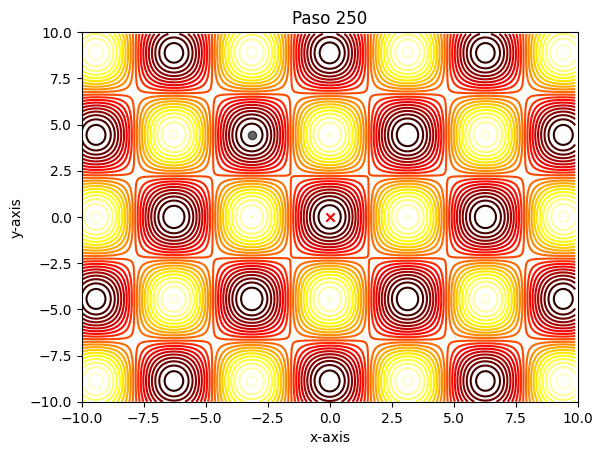

In [29]:
griewankSwGradientAnim = get_pos_animation(puntosi, 
                                      griewankDG, 
                                      limits=[(-10,10),(-10,10)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.1,
                                      levels = 20,
                                      mark=(0,0))

griewankSwGradientAnim.save('griewankGradient2D.gif', writer='imagemagick', fps=10)
Image(url='griewankGradient2D.png')

3D

In [30]:
X = [-2,2,2]
puntosi_3D, punto_min, iteration = gradient_descent(X,griewank_der_2D,learnRate, stopEpsilon, 300)

puntosi = np.array(puntosi, dtype=object)
puntosi_3D = np.array(puntosi_3D, dtype=object)
print(f"El punto mínimo es {punto_min}. Y terminó en la iteración {iteration}")
#get_gradient_descent_3D(puntosi_3D,griewankDG,limits=[(-2,2), (-1,3)], mark=(1,1,0))

El punto mínimo es [-3.09437204  4.12248276  0.59673636]. Y terminó en la iteración 300


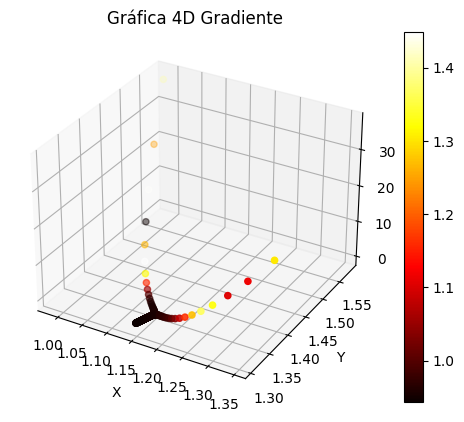

In [154]:
x = []
y = []
z = []
for valor in puntosi_3D:
    x.append(valor[0])
    y.append(valor[1])
    z.append(valor[2])
x = np.array(x[10:])
y = np.array(y[10:])
z = np.array(z[10:])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


c = np.ones(240) + np.sum((x+y+z)/4000) - np.cos(x)*np.cos(0.5*y*np.sqrt(2)) * np.cos(z * np.sqrt(3)/3) 
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Gráfica 4D Gradiente")

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [31]:
puntosi_3D

array([[-2, 2, 2],
       [-1.9976674396386054, 2.0046592958386604, 2.001330815141444],
       [-1.995384298399741, 2.0092888063265573, 2.0026265978240376],
       [-1.9931501987132956, 2.0138892097664747, 2.0038879064018116],
       [-1.9909647713407967, 2.0184611771880996, 2.005115285585522],
       [-1.9888276553395683, 2.0230053724931074, 2.0063092666120275],
       [-1.986738498023555, 2.0275224526016524, 2.007470367412435],
       [-1.9846969549211886, 2.0320130676000208, 2.008599092778789],
       [-1.9827026897306432, 2.0364778608892125, 2.0096959345290935],
       [-1.9807553742728092, 2.0409174693342518, 2.0107613716704713],
       [-1.9788546884422915, 2.0453325234140265, 2.011795870560285],
       [-1.9770003201567192, 2.0497236473714877, 2.0127998850650566],
       [-1.9751919653046361, 2.0540914593640465, 2.0137738567170342],
       [-1.9734293276922212, 2.0584365716140227, 2.0147182148682723],
       [-1.9717121189890756, 2.0627595905590144, 2.0156333768420986],
       [

In [32]:
gwX = []
gwY = []
gwZ = []
for i in puntosi_3D:
    gwX.append([i[0],i[1]])
    gwY.append([i[1],i[2]])
    gwZ.append([i[0],i[2]])


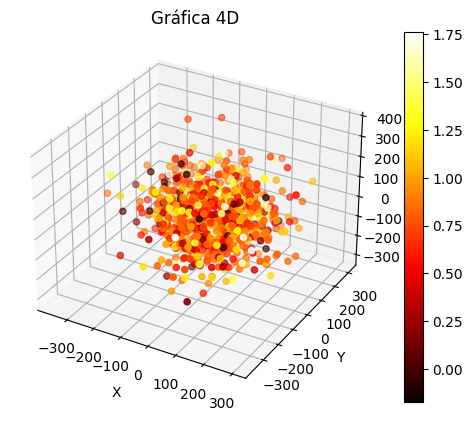

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =  100 * np.random.standard_normal(1000)
y =  100 * np.random.standard_normal(1000)
z =  100 * np.random.standard_normal(1000)
c = np.ones(1000) + np.sum((x+y+z)/4000) - np.cos(x)*np.cos(0.5*y*np.sqrt(2)) * np.cos(z * np.sqrt(3)/3) 
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Gráfica 4D")

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

2023-03-17 02:39:17,909 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-17 02:39:17,912 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


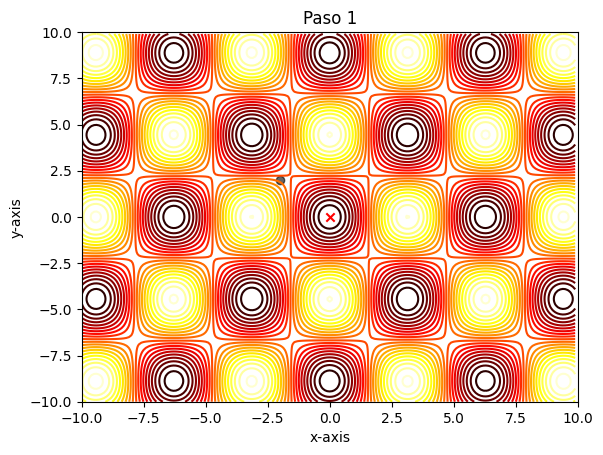

In [36]:
griewankXYGradientAnim = get_pos_animation(gwX, 
                                      griewankDG, 
                                      limits=[(-10,10),(-10,10)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.1,
                                      levels = 20,
                                      mark=(0,0))

griewankSwGradientAnim.save('griewankGradient3D.gif', writer='imagemagick', fps=10)
Image(url='griewankGradient3D.png')

### Algoritmo genético PyGAD

Funciones de fitness para la función objetivo. 

In [37]:
fitness_function = griewank

num_generations = 200
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -100
init_range_high = 100

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [38]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=griewank,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/root/venv/lib/python3.9/site-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/root/venv/lib/python3.9/site-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

In [39]:
ga_instance.run()

In [40]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 25.1168491  -26.62961575]
Fitness value of the best solution = -33.53159544503327
Predicted output based on the best solution : 0.0


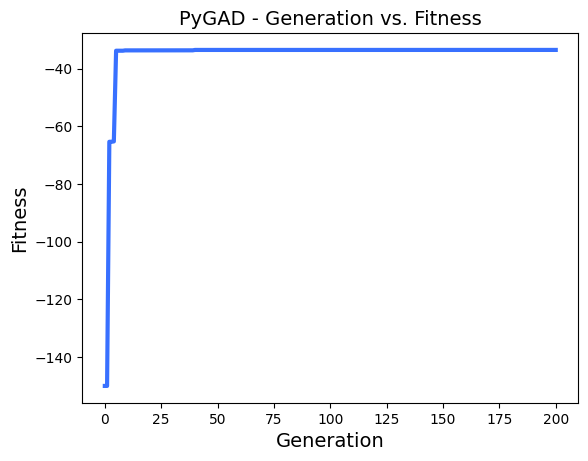

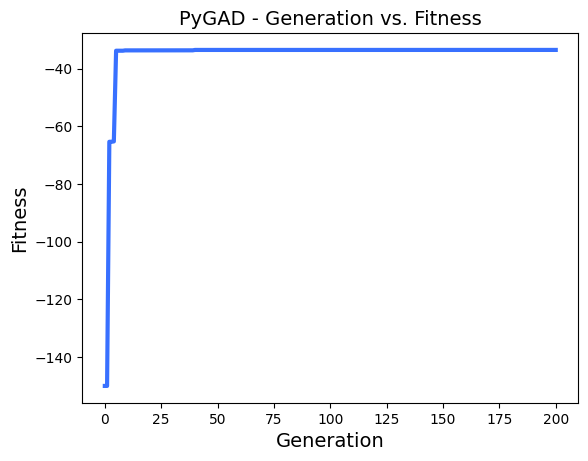

In [41]:
ga_instance.plot_fitness()

In [42]:
ga_instance.best_solution()

(array([ 25.1168491 , -26.62961575]), -33.53159544503327, 0)

In [43]:
soluciones = ga_instance.solutions
len(soluciones)

1608

In [44]:
j = 1
Pob = np.array(soluciones[j*8:(j+1)*8])
Pob

array([[ -8.16807598, -26.52667965],
       [ -8.16807598, -52.29196041],
       [ 24.00807123,  48.15969369],
       [ 24.23269366,  23.01203112],
       [ -8.16807598, -26.70039145],
       [ -8.11735305, -52.88787589],
       [ 45.38567942,  47.6405169 ],
       [ 24.00807123,  23.65209888]])

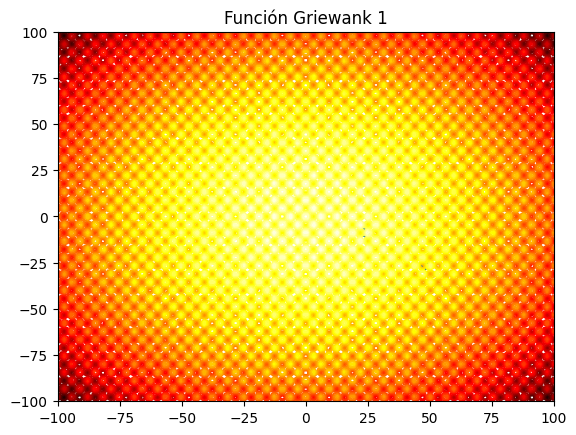

In [45]:
ncols = 150
nrows = 150
X = np.linspace(-100, 100, ncols)     
Y = np.linspace(-100, 100, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

for j in range(1):
    Pob = np.array(soluciones[j*8:(j+1)*8])
    fig, ax = plt.subplots()
    ax.contour(X,Y,Z, levels = 30)
    ax.scatter(Pob[0], Pob[1])
    plt.title("Función Griewank " + str(j+1))
    plt.show()

In [46]:
%matplotlib inline

''

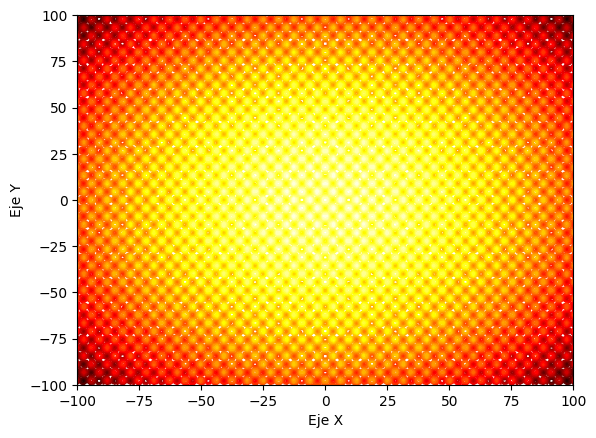

In [47]:
fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 30)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
;

In [48]:
# initialization function: plot the background of each frame

def init():
    scatter.set_data([], [])
    return (scatter,)

In [49]:
# animation function. This is called sequentially
def animate(i):
    ax.set_title("Paso "+ str(i+1))
    Pob = np.array(soluciones[i*8:(i+1)*8])
    scatter.set_data(Pob[:,0],Pob[:,1])
    return (scatter, )

In [50]:
anim = animation.FuncAnimation(fig, animate,
                               frames=50, interval=10, blit=True)

In [51]:
#anim.save('griewank.gif', writer='imagemagick')


### PySwarms

In [52]:
#from scipy.optimize import griewank, griewank_der

# r = np.sum(
#       100 * (x.T[1:] - x.T[:-1] ** 2.0) ** 2 + (1 - x.T[:-1]) ** 2.0, axis=0
#    )

#    return r

2D

In [53]:
%%time

random.seed(3141592654)
c1 = random.random()
c2 = random.random()
w = random.random()
upper = 100 * np.ones(2)
lower = -upper
options = {'c1': c1, 'c2': c2, 'w':w}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds = (lower, upper))
iters : int = 200
cost, pos = optimizer.optimize(griewankSw, iters)

2023-03-17 02:40:03,552 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.44466065954778444, 'c2': 0.21828385485578183, 'w': 0.20345227149297818}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=6.8
2023-03-17 02:40:04,230 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.8044187864867505, best pos: [-39.82702123 -47.18000856]
CPU times: user 307 ms, sys: 58.4 ms, total: 366 ms
Wall time: 695 ms


In [54]:
griewankPosHistory = optimizer.pos_history
griewankPosHistory

[array([[-39.84968379, -47.23460921],
        [-38.39502526,  -4.53886131],
        [ 86.89098465, -87.89748172],
        [ 75.21307489, -42.22825871],
        [-71.07657322,  28.97612588],
        [ -3.23869534,   6.57634734],
        [-48.36033129,  17.34518379],
        [ 97.8895458 , -63.04307632],
        [-12.75612852, -20.58349241],
        [ 79.29686218,  55.1518799 ]]),
 array([[-39.8316307 , -47.1911141 ],
        [-38.47066645, -13.00583651],
        [ 68.12624925, -82.53921167],
        [ 64.05098999, -43.07351617],
        [-65.02236114,  26.56949982],
        [-10.5497504 ,   1.12428831],
        [-46.7350884 ,  16.20197064],
        [ 72.37706729, -62.01257109],
        [-15.30831549, -20.53713883],
        [ 64.18225411,  47.1848657 ]]),
 array([[-39.82795776, -47.18226492],
        [-38.54020426, -20.21031095],
        [ 61.80194128, -75.01635669],
        [ 42.54997372, -43.50447828],
        [-60.28251798,  14.28525985],
        [-15.23927811,  -2.86672535],
        

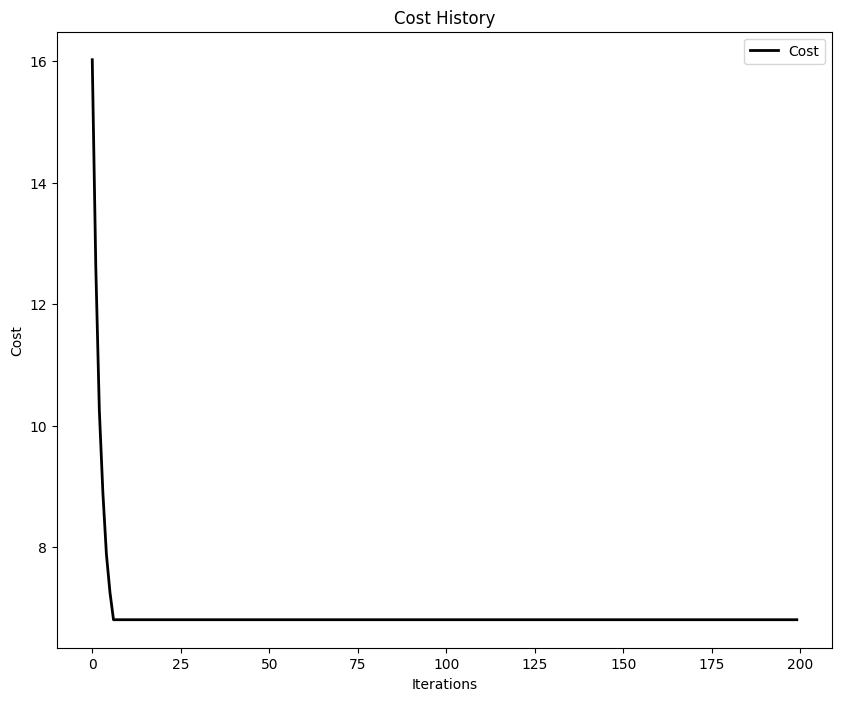

In [55]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [56]:
ncols = 150
nrows = 150
X = np.linspace(-100, 100, ncols)     
Y = np.linspace(-100, 100, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])


Text(0, 0.5, 'Eje Y')

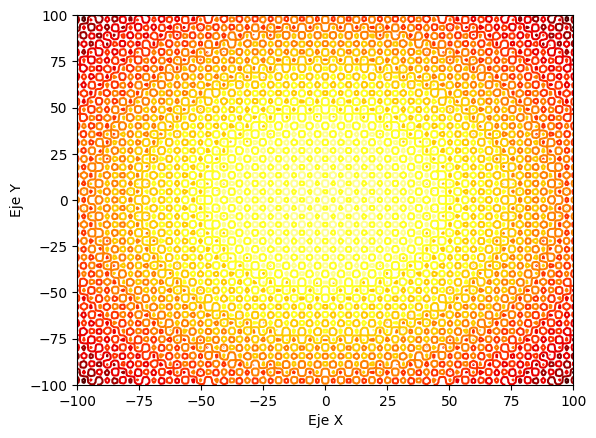

In [57]:
fig, ax = plt.subplots(1,1)

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 10)
scatter = ax.scatter(x=[], y=[],s=200, color="black", alpha=1, marker="x",)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

In [58]:
# animation function. This is called sequentially
def animate(i):
    ax.set_title("Paso "+ str(i+1))
    Pob = griewankPosHistory[i]
    scatter.set_offsets(Pob)
    return (scatter, )

In [59]:
anim = animation.FuncAnimation(fig, animate,
                               frames=200, interval=10, blit=True)

In [60]:
anim.save('griewankSW.gif', writer='imagemagick')

2023-03-17 02:40:05,486 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-17 02:40:05,488 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


3D

In [61]:

random.seed(3141592654)
c1 = random.random()
c2 = random.random()
w = random.random()
upper = 100 * np.ones(3)
lower = -upper
options = {'c1': c1, 'c2': c2, 'w':w}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds = (lower, upper))
iters : int = 200
cost, pos = optimizer.optimize(griewankSw, iters)

2023-03-17 02:40:40,521 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.44466065954778444, 'c2': 0.21828385485578183, 'w': 0.20345227149297818}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=10.7
2023-03-17 02:40:41,155 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.678580717095292, best pos: [-78.79309037  21.9296118   12.52913151]


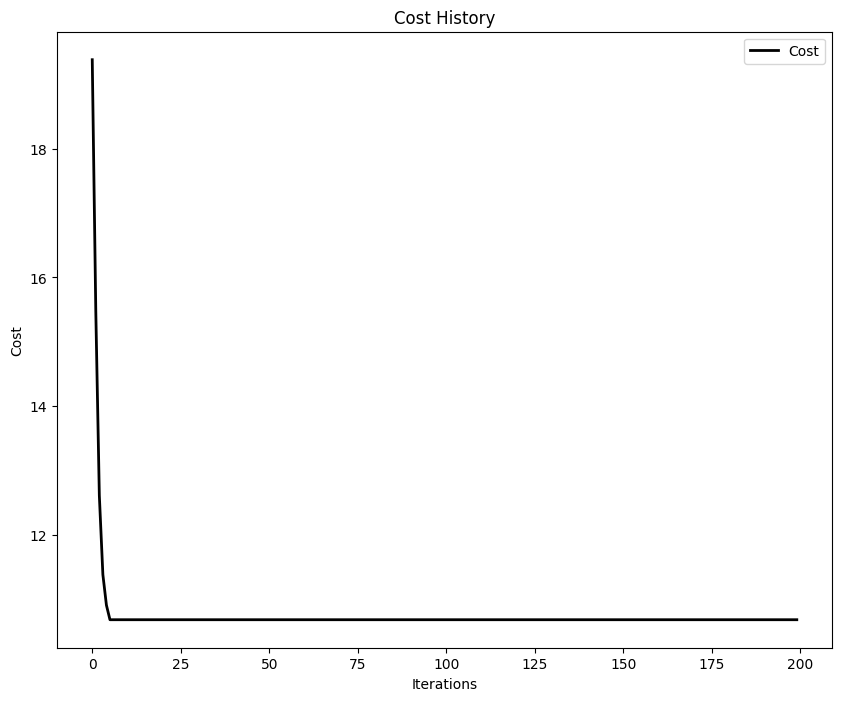

In [62]:
griewank3DPosHistory = optimizer.pos_history
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [63]:
griewank3DPosHistory

[array([[-79.01797668,  21.7798781 ,  12.42295689],
        [-58.10160619,  30.70065531, -22.5805915 ],
        [-68.18604413, -64.38640307, -49.19671189],
        [ 31.43183717,  22.86511431,  -8.49254803],
        [ 62.46098833, -29.87114812, -22.12679113],
        [-46.93923457, -46.78896536,  38.91497165],
        [ 23.07630817,  71.20800881,  32.64847844],
        [  2.16972637,  79.68078922, -50.04695659],
        [ 66.11681332,  43.6096166 ,  46.14378855],
        [ 85.86695473, -25.60028906,  76.73188495]]),
 array([[-78.83878153,  21.89918973,  12.50755953],
        [-60.85302245,  28.94912123, -18.25071162],
        [-68.83941703, -62.13066356, -48.62005149],
        [ 11.28050396,  22.78597542,  -4.32296572],
        [ 39.0420124 , -27.94926222, -19.65653343],
        [-46.93460457, -36.9319609 ,  38.94893572],
        [ 21.16025143,  65.63019131,  28.81454511],
        [ -1.91508727,  69.57547728, -48.21991666],
        [ 45.04540004,  43.03604808,  39.7275816 ],
        [ 

### Evolución diferencial

the minimum point is x 
[-3.9226057659803847e-07, 3.4277349562372742e-06]
the minimum value is y 
9.529044220357719e-11


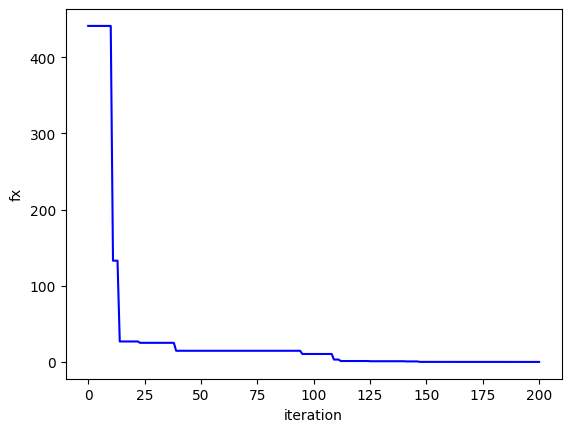

In [64]:
# -*- coding: cp936 -*-
import math
 
# Función Griewank
def object_function(fn, x):
    return -fn(x)

 # Inicialización de la población
def initialtion(NP, len_x, value_down_range, value_up_range):
    np_list = [] # población, cromosoma
    for i in range(0,NP):
        x_list = [] # individual, gen
        for j in range(0,len_x):
            x_list.append(value_down_range + random.random() * (value_up_range - value_down_range))
        np_list.append(x_list)
    return np_list
 # Restar lista
def substract(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]-b_list[i])
    return new_list
 # Agregar listas
def add(a_list,b_list):
    a = len(a_list)
    new_list = []
    for i in range(0,a):
        new_list.append(a_list[i]+b_list[i])
    return new_list
 # Lista de multiplicación
def multiply(a,b_list):
    b = len(b_list)
    new_list = []
    for i in range(0,b):
        new_list.append(a * b_list[i])
    return new_list
 # Variación
def mutation(np_list, NP, F):
    v_list = []
    for i in range(0,NP):
        r1 = random.randint(0,NP-1)
        while r1 == i:
            r1 = random.randint(0,NP-1)
        r2 = random.randint(0,NP-1)
        while r2 == r1 | r2 == i:
            r2 = random.randint(0,NP-1)
        r3 = random.randint(0,NP-1)
        while r3 == r2 | r3 == r1 | r3  == i:
            r3 = random.randint(0,NP-1)
        
        v_list.append(add(np_list[r1], multiply(F, substract(np_list[r2],np_list[r3]))))
    return v_list
 # Cruz
def crossover(np_list,v_list, NP, len_x, CR):
    u_list = []
    for i in range(0,NP):
        vv_list = []
        for j in range(0,len_x):
            if (random.random() <= CR) | (j == random.randint(0,len_x - 1)):
                vv_list.append(v_list[i][j])
            else:
                vv_list.append(np_list[i][j])
        u_list.append(vv_list)
    return u_list
 # Seleccionar
def selection(u_list,np_list, fn, NP):
    for i in range(0,NP):
        if object_function(fn, u_list[i]) <= object_function(fn, np_list[i]):
            np_list[i] = u_list[i]
        else:
            np_list[i] = np_list[i]
    return np_list
 # Función principal
def EDPrincipal(fn, NP, F, CR, generation, len_x, value_up_range, value_down_range):
    """
    función usando ED para una función fn. 
    :fn: función a evaluar
    :NP: Población
    :F: Factor de Zoom
    :CR: Probabilidad de Cruce
    :generation: álgebra genética
    :len_x: el valor d (la cantidad de elementos en la lista x)
    :value_up_range: cota inferior de los valores de x
    :value_down_range: cota superior de los valores de x
    :return: min_xx, min_x, min_ff, generation, min_f
    """
    
    np_list = initialtion(NP, len_x, value_down_range, value_up_range)
    min_x = []
    min_f = []
    for i in range(0,NP):
        xx = []
        xx.append(object_function(fn, np_list[i]))
    min_f.append(min(xx))
    min_x.append(np_list[xx.index(min(xx))])
    for i in range(0,generation):
        v_list = mutation(np_list, NP, F)
        u_list = crossover(np_list,v_list, NP, len_x, CR)
        np_list = selection(u_list,np_list, fn, NP)
        for i in range(0,NP):
            xx = []
            xx.append(object_function(fn, np_list[i]))
        min_f.append(min(xx))
        min_x.append(np_list[xx.index(min(xx))])
    # Salida
    min_ff = min(min_f)
    min_xx = min_x[min_f.index(min_ff)]
    return min_xx, min_x, min_ff, generation, min_f

#Driver Code
min_xx, min_x, min_ff, generation, min_f = EDPrincipal(griewank,100,0.6,0.7,200,2,-600,600)
print('the minimum point is x ')
print(min_xx)
print('the minimum value is y ')
print(min_ff)
 # Dibujo
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'blue')
plt.xlabel('iteration')
plt.ylabel('fx')
plt.savefig('./iteration-f.png')
plt.show()

In [65]:
print(min_x,"\n", min_f)

[[227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [227.07556987624446, -95.01922681425197], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-25.65498462948294, 4.925918852297471], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-47.869197524850556, 23.308962394159067], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373078, 0.34790185687665165], [-1.1093654557373

Text(0, 0.5, 'Eje Y')

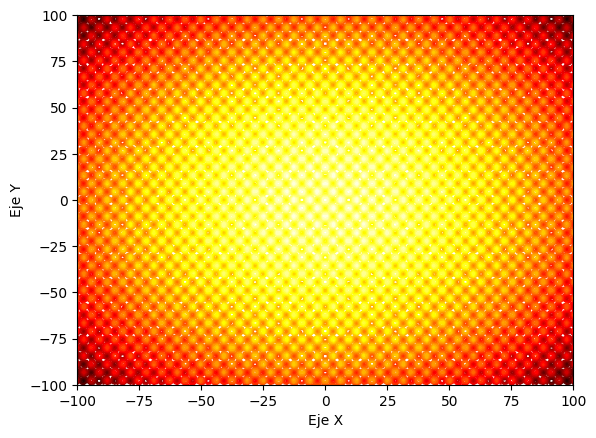

In [66]:
ncols = 150
nrows = 150
X = np.linspace(-100, 100, ncols)     
Y = np.linspace(-100, 100, nrows)     
X, Y = np.meshgrid(X, Y) 

Z = [griewank(np.array([X[i,j], Y[i,j]]),0) for i in range(nrows) for j in range(ncols)]
Z = np.array(Z).reshape([nrows,ncols])

fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 30)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")

2023-03-17 02:40:43,560 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-03-17 02:40:43,562 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


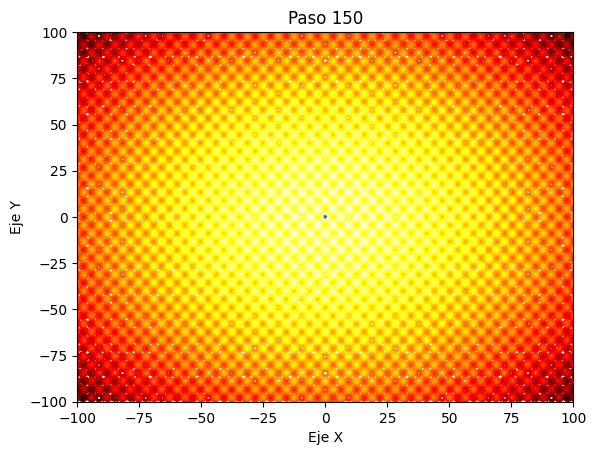

In [67]:
fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((-100, 100))
ax.contour(X,Y,Z, levels = 30)
scatter, = ax.plot([], [], lw=2)
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
def init():
    scatter.set_data([], [])
    return (scatter,)
    
listax1 = list()
listax2 = list()
for lista in min_x:
    listax1.append((lista[0]))
    listax2.append((lista[1]))

def __animate(i):
    ax.set_title("Paso "+ str(i+1))
    scatter.set_data([listax1[i:i+20],listax2[i:i+20]])
    return (scatter, )

anim = animation.FuncAnimation(fig, __animate, init_func=init,
                               frames=150, interval=10, blit=True)
anim.save('griewankED.gif', writer='imagemagick')

the minimum point is x 
[3.210418136984703, 13.135882142777437, 0.36680785800953314]
the minimum value is y 
13.716333276844505


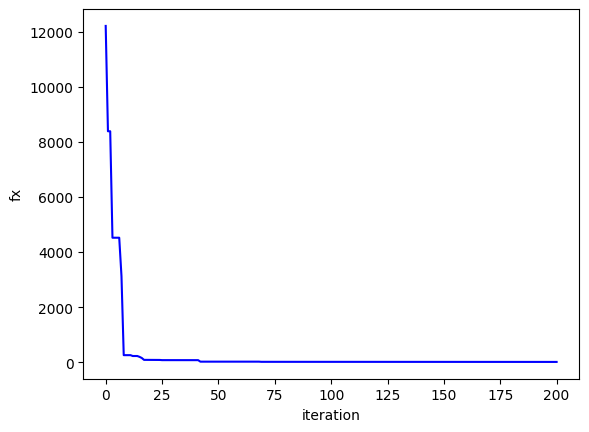

In [68]:
#Driver Code
min_xx, min_x, min_ff, generation, min_f = EDPrincipal(griewank,100,0.6,0.7,200,3,-600,600)
print('the minimum point is x ')
print(min_xx)
print('the minimum value is y ')
print(min_ff)
 # Dibujo
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'blue')
plt.xlabel('iteration')
plt.ylabel('fx')
plt.savefig('./iteration-f.png')
plt.show()

In [92]:
min_x

[[-319.7127540159746, -219.16506909091697, 216.6493257578731],
 [-319.7127540159746, -219.16506909091697, 216.6493257578731],
 [-319.7127540159746, -219.16506909091697, 216.6493257578731],
 [-53.71147246556063, -219.16506909091697, -263.6693836123024],
 [-53.71147246556063, -219.16506909091697, -263.6693836123024],
 [-53.71147246556063, -219.16506909091697, -263.6693836123024],
 [-53.71147246556063, -219.16506909091697, -263.6693836123024],
 [-53.71147246556063, -132.13728039464328, 58.87649431497843],
 [-53.71147246556063, -132.13728039464328, 58.87649431497843],
 [-53.71147246556063, -132.13728039464328, 58.87649431497843],
 [-53.71147246556063, -132.13728039464328, 58.87649431497843],
 [-102.7740991442706, -14.722983197501284, -5.214040772321276],
 [23.45396790462351, -53.44360216100712, 58.69505001048676],
 [39.53634150911852, -1.0382174112322744, 9.733046537227622],
 [39.53634150911852, -1.0382174112322744, 9.733046537227622],
 [39.53634150911852, -1.0382174112322744, 9.7330465372

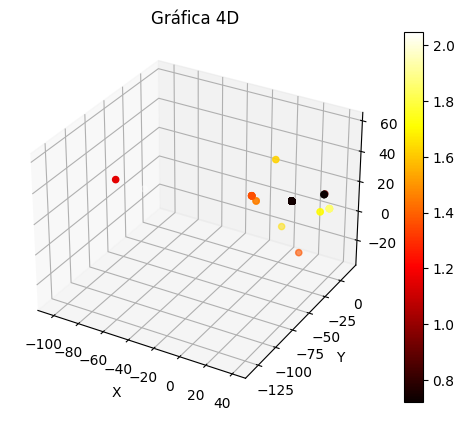

In [148]:
x = []
y = []
z = []
for valor in min_x:
    x.append(valor[0])
    y.append(valor[1])
    z.append(valor[2])
x = np.array(x[10:])
y = np.array(y[10:])
z = np.array(z[10:])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


c = np.ones(191) + np.sum((x+y+z)/4000) - np.cos(x)*np.cos(0.5*y*np.sqrt(2)) * np.cos(z * np.sqrt(3)/3) 
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Gráfica 4D")

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

## 

## Rosenbrock

In [69]:
def rosenBrock_fit(x, solutionidx=0):
    f = sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

    fitness : float = -(100 * f)
    #return f
    return fitness

In [70]:
def rosenBrock_fitWL2D(x, solutionidx=0): #withList
    f = 100.0*(x[1] - x[0]**2.0)**2.0 + (1 - x[0])**2.0
    fitness : float = -(100 * f)

    return fitness

In [71]:
def rosenBrock_fitWL3D(x, solutionidx=0): #withList
    f1 = 100.0*(x[1] - x[0]**2.0)**2.0 + (1 - x[0])**2.0
    f2 = 100.0*(x[2] - x[1]**2.0)**2.0 + (1 - x[1])**2.0
    f = f1 + f2
    fitness : float = -(100 * f)
    return fitness

In [94]:
print(rosenBrock_fit(np.array([1,2])))
print(rosenBrock_fitWL2D([1,2]))
print(-(100*rosen((1,2,3))))
print(rosenBrock_fitWL3D((1,2,3)))

-10000.0
-10000.0
-20100.0
-20100.0


### PySwarms

In [95]:
%%time
from pyswarms.utils.functions import single_obj as fx
from scipy.optimize import rosen, rosen_der

options = {'c1': 0.3, 'c2': 0.5, 'w':0.9}

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
iters : int = 100
cost, pos = optimizer.optimize(fx.rosenbrock, iters)

2023-03-17 02:52:26,102 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=3.28e-6
2023-03-17 02:52:26,386 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.278687500944069e-06, best pos: [0.99987569 0.99993203]
CPU times: user 154 ms, sys: 30 ms, total: 184 ms
Wall time: 304 ms


In [96]:
psPosHistory = optimizer.pos_history
psPosHistory

[array([[0.91257501, 0.45967822],
        [0.56467278, 0.47412869],
        [0.88765854, 0.83258209],
        [0.40134846, 0.25063399],
        [0.07420134, 0.00907607],
        [0.41171584, 0.20716437],
        [0.18702949, 0.50467634],
        [0.9772211 , 0.38316584],
        [0.93286646, 0.25691221],
        [0.45545029, 0.72805611]]),
 array([[0.9861368 , 0.98640952],
        [1.31861328, 1.08343747],
        [1.1866713 , 1.33788536],
        [0.56611911, 1.01809522],
        [0.64512678, 0.86177218],
        [0.95850016, 0.60107465],
        [0.50431147, 0.8577657 ],
        [1.64769116, 0.49423746],
        [0.99327587, 1.05212488],
        [1.27664246, 1.33463378]]),
 array([[1.05234241, 1.4604677 ],
        [1.76503706, 1.42982069],
        [1.39250529, 1.65422955],
        [0.79402743, 1.53614978],
        [1.08777826, 1.4720431 ],
        [1.4352847 , 0.96685845],
        [0.86500739, 1.09568433],
        [2.15636254, 0.71675603],
        [1.04666709, 1.74695887],
        [1

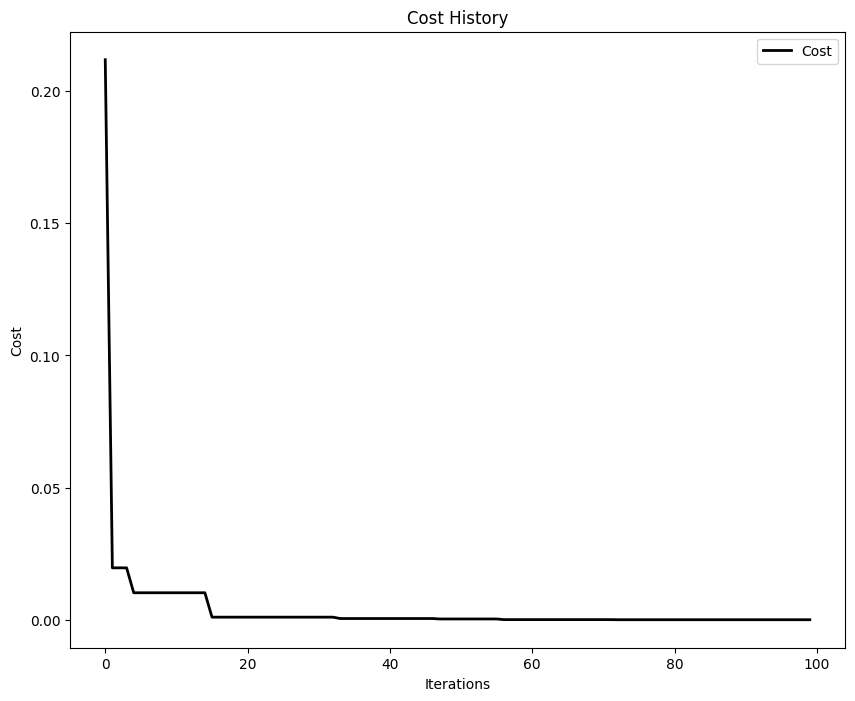

In [97]:
from pyswarms.utils.plotters import plot_cost_history, plot_contour
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [98]:
from IPython.display import Image
from pyswarms.utils.plotters.formatters import Mesher, Designer, Animator


In [99]:
m = Mesher(func=fx.rosenbrock,limits=[(-1,3), (-1,3)],levels=50, delta=0.01) 
d = Designer(limits=[(-1,3), (-1,3)], label=['x-axis', 'y-axis', 'z-axis'])

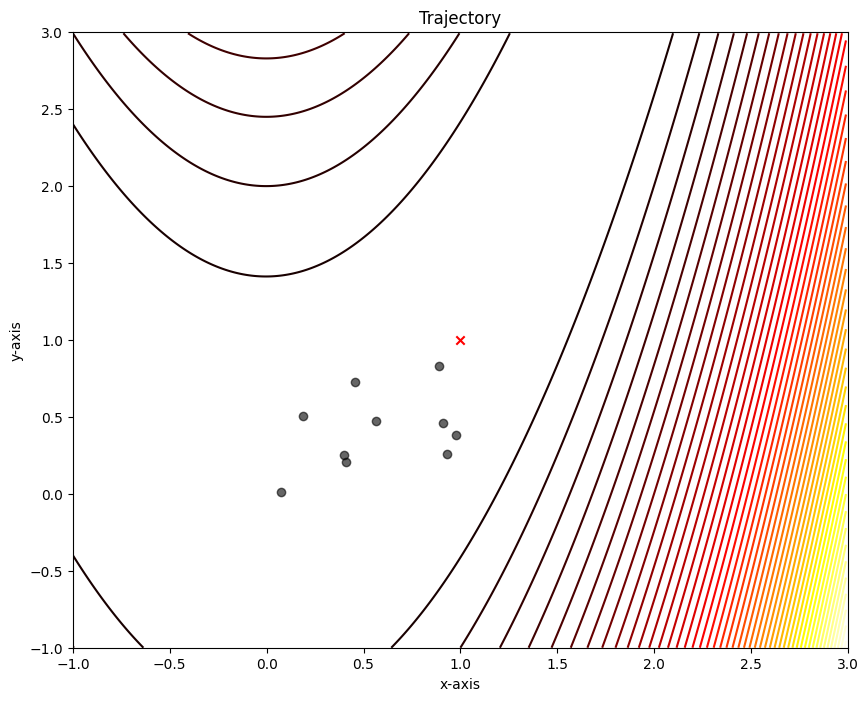

In [100]:

# Make animation
animat = plot_contour(pos_history=psPosHistory, 
                         mesher=m, designer=d,
                         mark=(1,1))

In [101]:
#animat.save('./RosenbrockGifs/rosenbrockSwarm.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockSwarm.gif')


3 variables de entrada

In [102]:
options3d = {'c1': 0.3, 'c2': 0.5, 'w':0.9}

optimizer3d = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options3d)
iters : int = 150
cost3d, pos3d = optimizer3d.optimize(fx.rosenbrock, iters)

2023-03-17 02:52:27,695 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.3, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|150/150, best_cost=0.0951
2023-03-17 02:52:28,178 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.09510206070465538, best pos: [1.13105448 1.27907491 1.6366619 ]


In [103]:
rosen_swarm_pos_history_3d = optimizer3d.pos_history
rosen_swarm_pos_history_3d =  np.array(rosen_swarm_pos_history_3d)
rosen_swarm_pos_history_3d

array([[[0.90577188, 0.62657515, 0.59883101],
        [0.6088023 , 0.04979095, 0.51572402],
        [0.32775167, 0.74921213, 0.45926364],
        ...,
        [0.20699577, 0.99298935, 0.45132778],
        [0.19038958, 0.65527524, 0.47616762],
        [0.25257289, 0.09715088, 0.56015413]],

       [[1.54268763, 0.88985437, 0.8279332 ],
        [1.52360862, 0.53345294, 0.69693857],
        [0.52899909, 0.85969316, 0.95837599],
        ...,
        [1.24953324, 1.69899397, 0.50018658],
        [1.16481595, 1.08166904, 0.58311265],
        [0.65439823, 1.11959609, 1.16539562]],

       [[2.03938034, 1.08704913, 0.93891161],
        [2.09057718, 0.92013483, 0.84074519],
        [0.82157728, 0.9406187 , 1.22985659],
        ...,
        [1.81975966, 1.92055804, 0.53700383],
        [1.82560839, 1.22017717, 0.67637546],
        [0.95293032, 1.77722838, 1.62059131]],

       ...,

       [[1.14176347, 1.27688905, 1.60035628],
        [1.13117042, 1.27925137, 1.63783487],
        [1.13076995, 1

In [104]:
rosen_swarm_pos_history_YZ = []
rosen_swarm_pos_history_XZ = []

rosen_swarm_pos_history_3d[0][:,1:]
rosen_swarm_pos_history_3d[0][:,::2]

for i in range(iters):
    rosen_swarm_pos_history_YZ.append(rosen_swarm_pos_history_3d[i][:,1:])
    rosen_swarm_pos_history_XZ.append(rosen_swarm_pos_history_3d[i][:,::2])

print(rosen_swarm_pos_history_YZ[0])
rosen_swarm_pos_history_XZ[0]


[[0.62657515 0.59883101]
 [0.04979095 0.51572402]
 [0.74921213 0.45926364]
 [0.63996166 0.96844569]
 [0.75914583 0.71915263]
 [0.25444037 0.50795731]
 [0.50750267 0.76446449]
 [0.99298935 0.45132778]
 [0.65527524 0.47616762]
 [0.09715088 0.56015413]]


array([[0.90577188, 0.59883101],
       [0.6088023 , 0.51572402],
       [0.32775167, 0.45926364],
       [0.24763224, 0.96844569],
       [0.39755905, 0.71915263],
       [0.90305836, 0.50795731],
       [0.19230555, 0.76446449],
       [0.20699577, 0.45132778],
       [0.19038958, 0.47616762],
       [0.25257289, 0.56015413]])

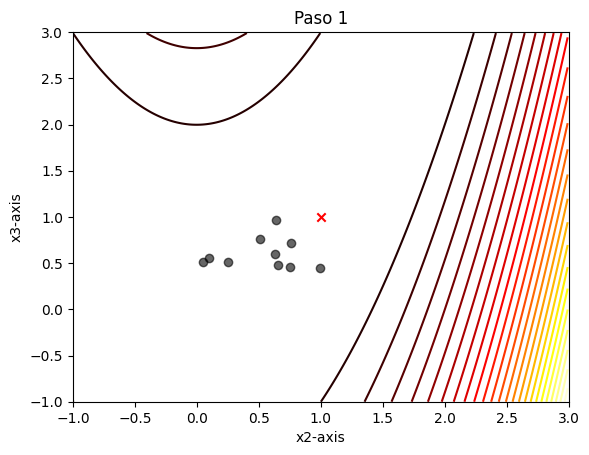

In [105]:
rosen_swarm_YZ_anim = get_pos_animation(rosen_swarm_pos_history_YZ,
                                        rosen,
                                        limits=[(-1,3),(-1,3)],
                                        labels = ['x2-axis', 'x3-axis'],
                                        levels=30,
                                        mark=(1,1)
                                        )

#rosen_swarm_YZ_anim.save('./RosenbrockGifs/rosenbrockSwarmYZ.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockSwarmYZ.gif')

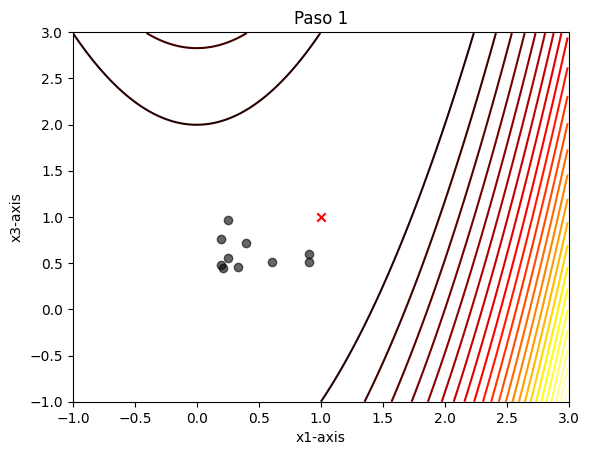

In [106]:
rosen_swarm_XZ_anim = get_pos_animation(rosen_swarm_pos_history_XZ,
                                        rosen,
                                        limits=[(-1,3),(-1,3)],
                                        labels = ['x1-axis', 'x3-axis'],
                                        levels=30,
                                        mark=(1,1)
                                        )

#rosen_swarm_XZ_anim.save('./RosenbrockGifs/rosenbrockSwarmXZ.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockSwarmXZ.gif')

### Descenso por gradiente

In [107]:
learnRate = 0.00150
stopEpsilon = 1e-4

five_points_diferent_gradient_descent_positions = []

for i in range(250):
    five_points_diferent_gradient_descent_positions.append(list((0,0,0,0,0)))

for k in range(5):

    X = [np.random.uniform(-2.1, -1.5), np.random.uniform(1, 2)]
    #X = [-2,2]
    puntosi, punto_min, iteration = gradient_descent(X,rosen_der,learnRate, stopEpsilon,250)
    #print(puntosi)
    for n in range(250):
        five_points_diferent_gradient_descent_positions[n][k] = puntosi[n]
            


five_points_diferent_gradient_descent_positions = np.array(list(map(np.array, five_points_diferent_gradient_descent_positions)))

puntosi_3D = list(map(list, puntosi))
for punto in puntosi_3D:
  punto.append(rosen(punto))

puntosi = np.array(puntosi, dtype=object)
puntosi_3D = np.array(puntosi_3D, dtype=object)


print(f"El punto mínimo es {punto_min}. Y terminó en la iteración {iteration}")

El punto mínimo es [1.14278064 1.30647205]. Y terminó en la iteración 250


In [108]:
puntosi[2]

array([1.8427033373794115, 2.1198715514466078], dtype=object)

In [109]:
five_points_diferent_gradient_descent_positions

array([[[-1.6484026 ,  1.98757105],
        [-1.93971607,  1.73213517],
        [-1.7320093 ,  1.79397129],
        [-1.59532182,  1.79383897],
        [-2.05618541,  1.55296907]],

       [[-0.91879323,  2.20646908],
        [ 0.43210001,  2.34124415],
        [-0.47065093,  2.15573677],
        [-0.86848021,  2.0192028 ],
        [ 1.2530736 ,  2.35544788]],

       [[-1.66403349,  1.79778266],
        [ 0.99238815,  1.69488403],
        [-1.01244571,  1.57546943],
        [-1.52202255,  1.63971932],
        [ 1.84270334,  2.11987155]],

       ...,

       [[-0.89598903,  0.81086236],
        [ 1.14284518,  1.30661978],
        [-0.88217643,  0.78630735],
        [-0.88692737,  0.79471026],
        [ 1.14298702,  1.30694448]],

       [[-0.8946373 ,  0.80844256],
        [ 1.14277642,  1.30646238],
        [-0.88080251,  0.78388572],
        [-0.88556114,  0.79228923],
        [ 1.1429182 ,  1.30678693]],

       [[-0.89328343,  0.80602256],
        [ 1.14270768,  1.30630505],
     

In [110]:
learnRate = 0.00132
stopEpsilon = 1e-5
X = [np.random.uniform(-2, 3),np.random.uniform(-2, 3),np.random.uniform(-2, 3)]
puntosPrueba, puntoMin, iteration = gradient_descent(X,rosen_der,learnRate, stopEpsilon)
print(f"El punto mínimo es {puntoMin}. Y terminó en la iteración {iteration}")

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_optimize.py:371: RuntimeWarning: overflow encountered in multiply
  400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm))
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_optimize.py:370: RuntimeWarning: overflow encountered in square
  der[1:-1] = (200 * (xm - xm_m1**2) -
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/optimize/_optimize.py:372: RuntimeWarning: overflow encountered in double_scalars
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
/tmp/ipykernel_159/2227045882.py:10: RuntimeWarning: invalid value encountered in subtract
  punto = punto - Lrate * funcDer(punto)
El punto mínimo es [nan nan nan]. Y terminó en la iteración 10000


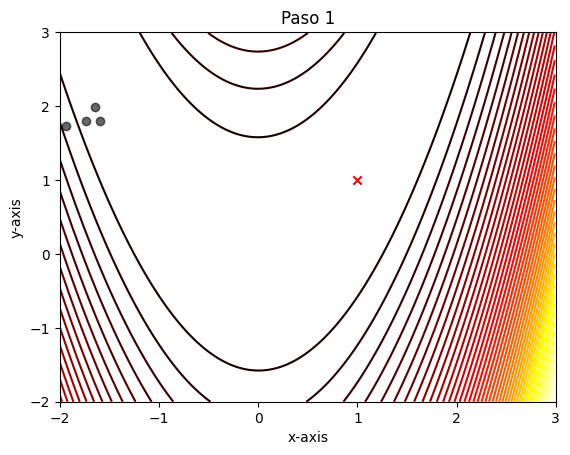

In [111]:
rosenGradientAnim = get_pos_animation(five_points_diferent_gradient_descent_positions, 
                                      rosen,
                                      limits=[(-2,3),(-2,3)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.01,
                                      mark=(1,1))

#rosenGradientAnim.save('./RosenbrockGifs/rosenbrockGradient2D.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockGradient2D.png')

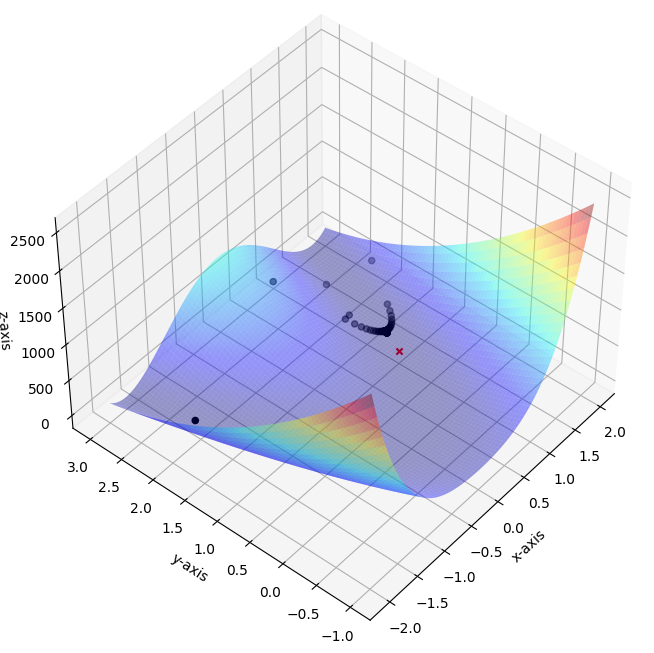

In [112]:

get_gradient_descent_3D(puntosi_3D,rosen,limits=[(-2,2), (-1,3)], mark=(1,1,0))

### Algoritmo genético PyGAD

In [113]:
function_inputs = np.array([-.5,2])
fitness_function = rosenBrock_fit

num_generations = 200
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = 0
init_range_high = 2

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [114]:
ga_rosen_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       save_solutions=True)

/root/venv/lib/python3.9/site-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/root/venv/lib/python3.9/site-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

In [115]:
ga_rosen_instance.run()

In [116]:
rosen_solution, rosen_solution_fitness, rosen_solution_idx = ga_rosen_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=rosen_solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=rosen_solution_fitness))

rosen_prediction = np.sum(np.array(function_inputs)*rosen_solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=rosen_prediction))

Parameters of the best solution : [0.91431115 0.84607045]
Fitness value of the best solution = -1.7554852175396842
Predicted output based on the best solution : 1.2349853332527796


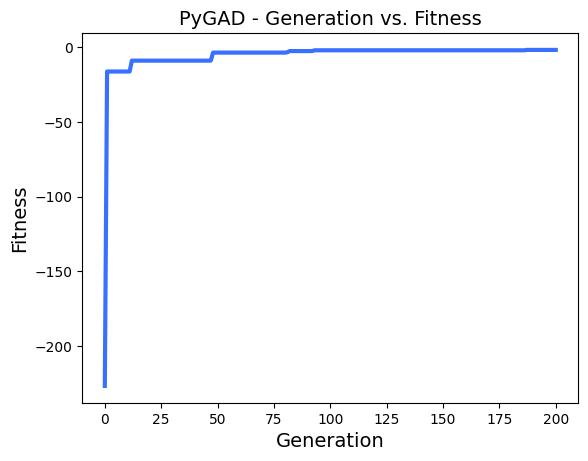

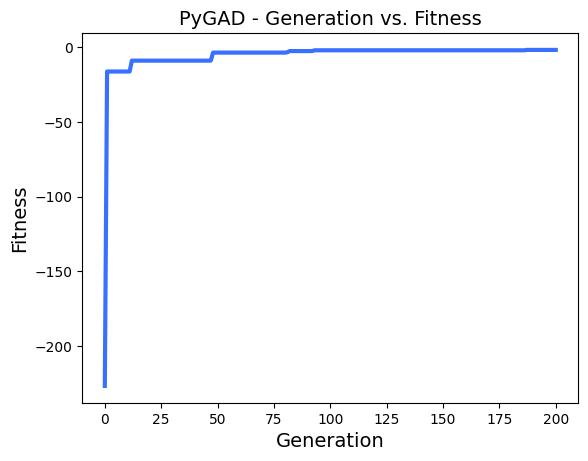

In [117]:
ga_rosen_instance.plot_fitness()

In [118]:
ga_rosen_instance.best_solution()

(array([0.91431115, 0.84607045]), -1.7554852175396842, 0)

In [119]:
ga_rosen_soluciones = ga_rosen_instance.solutions
ga_rosen_soluciones

[[1.5342586237803317, 1.5901828821791486],
 [0.294308808203257, 0.219572116984031],
 [0.014386431590583726, 0.6154744279072333],
 [0.2583641171351856, 0.5229074649221561],
 [1.083016223913427, 1.9119512507307113],
 [1.3825599805195288, 0.5485814667347662],
 [1.956413084305888, 0.7840063834975746],
 [1.8227108204725047, 0.952542065522689],
 [0.294308808203257, 0.219572116984031],
 [0.294308808203257, 0.3772222838035981],
 [0.014386431590583726, 0.9174935163845628],
 [1.3776944506363658, 1.9119512507307113],
 [0.32259767770422076, 0.219572116984031],
 [0.294308808203257, 1.1841452042303706],
 [-0.2094237190503987, 0.6154744279072333],
 [0.014386431590583726, 2.3536123722775257],
 [1.3776944506363658, 1.9119512507307113],
 [1.3776944506363658, -0.3138825247190955],
 [0.6601571175752916, 0.219572116984031],
 [0.294308808203257, 0.20764585470114305],
 [0.294308808203257, 2.502630094376321],
 [0.32259767770422076, -0.029352764102267948],
 [0.81962821536344, 0.219572116984031],
 [-0.617951644

In [120]:
j=1
secuencias = np.array(ga_rosen_soluciones[j*8:(j+1)*8])
secuencias

array([[ 0.29430881,  0.21957212],
       [ 0.29430881,  0.37722228],
       [ 0.01438643,  0.91749352],
       [ 1.37769445,  1.91195125],
       [ 0.32259768,  0.21957212],
       [ 0.29430881,  1.1841452 ],
       [-0.20942372,  0.61547443],
       [ 0.01438643,  2.35361237]])

In [121]:
num_soluciones_div_por_num_pops = 201 # 1608/8 

ga_rosen_solutions_separated_by_8 = []

#/////Se separan los valores de soluciones entre 8, ya que se especificó en el modelo de PyGad que fueran soluciones por pop////

for j in range(num_soluciones_div_por_num_pops):
    ga_rosen_solutions_separated_by_8.append(np.array(ga_rosen_soluciones[j*8:(j+1)*8]))


#Queda como array de arrays, siendo los internos de 8 soluciones cada uno

ga_rosen_solutions_separated_by_8 = np.array(ga_rosen_solutions_separated_by_8) 
print(ga_rosen_solutions_separated_by_8[0])

[[1.53425862 1.59018288]
 [0.29430881 0.21957212]
 [0.01438643 0.61547443]
 [0.25836412 0.52290746]
 [1.08301622 1.91195125]
 [1.38255998 0.54858147]
 [1.95641308 0.78400638]
 [1.82271082 0.95254207]]


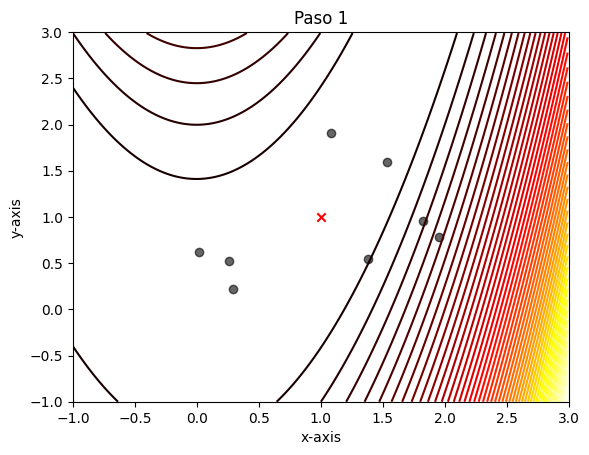

In [122]:
rosenGradientAnim = get_pos_animation(ga_rosen_solutions_separated_by_8, 
                                      rosen, 
                                      limits=[(-1,3),(-1,3)],
                                      labels=['x-axis', 'y-axis', 'z-axis'],
                                      delta=0.01,
                                      mark=(1,1))

#rosenGradientAnim.save('./RosenbrockGifs/rosenbrockPyGad2D.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockPyGad2D.gif')

### Evolución diferencial

the minimum point is x 
[1.000046850087367, 1.000105464503063]
the minimum value is y 
1.6367856810414127e-06


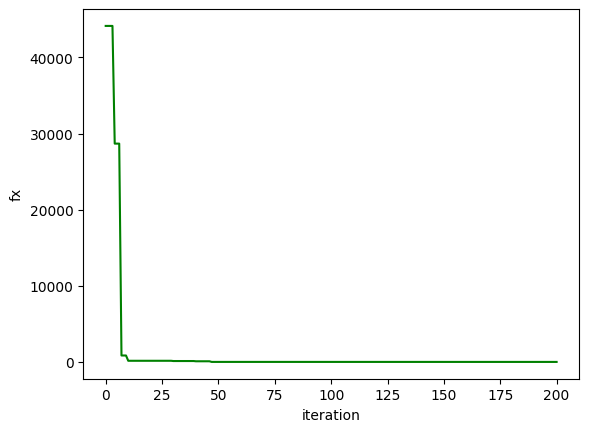

In [123]:
#Driver Code
min_X, minx, min_Y, generation, min_f = EDPrincipal(rosenBrock_fitWL2D,100,-2, 4,200,2,0,2)
print('the minimum point is x ')
print(min_X)
print('the minimum value is y ')
print(min_Y)
 # Dibujo
x_label = np.arange(0,generation+1,1)
plt.plot(x_label,min_f,color = 'green')
plt.xlabel('iteration')
plt.ylabel('fx')
#plt.savefig('./rosen-iterations-ED.png')
plt.show()

In [124]:
rosen_ev_dif_pos_history = np.array(minx)
rosen_ev_dif_pos_history

array([[ 0.56535976,  1.27201222],
       [ 0.56535976,  1.27201222],
       [ 0.56535976,  1.27201222],
       [ 0.56535976,  1.27201222],
       [ 0.56535976,  1.27201222],
       [-0.26126344, -0.21547906],
       [-0.26126344, -0.21547906],
       [-0.26126344, -0.21547906],
       [-0.26126344, -0.21547906],
       [-0.26126344, -0.21547906],
       [-0.26126344, -0.21547906],
       [-0.15633675,  0.28353891],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [-0.06936933,  0.26502886],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,  1.21388002],
       [ 1.09028113,

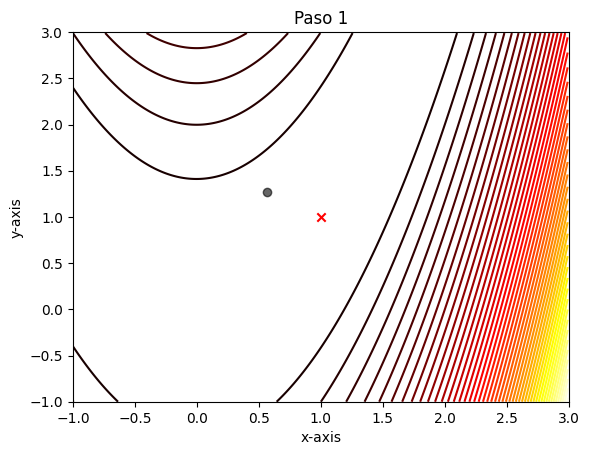

In [125]:
rosen_ev_dif_animation = get_pos_animation(
                                           rosen_ev_dif_pos_history,
                                           rosen,
                                           limits=[(-1,3),(-1,3)],
                                           labels=['x-axis','y-axis'],
                                           levels= 50,
                                           delta=0.01,
                                           mark=(1,1)
                                          )
#rosen_ev_dif_animation.save('./RosenbrockGifs/rosenbrockEvDif2D.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockEvDif2D.gif')

Evolución diferencial 3d

the minimum point is x 
[1.0368437398631278, 1.0857156323848547, 1.180748172385871]
the minimum value is y 
7.053848627527834


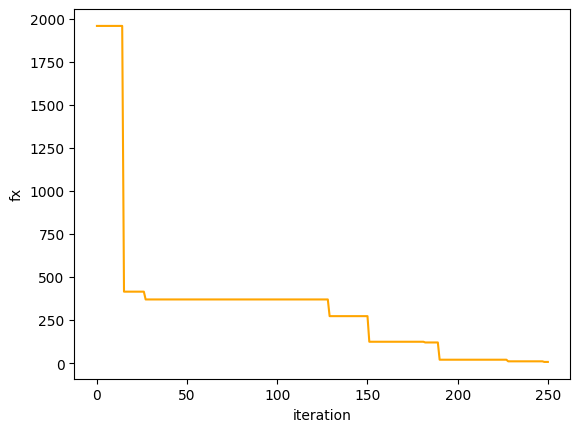

In [126]:
#Driver Code
min_point, rosen_ev_dif_history_3d, min_func_value, rosen_ev_dif_gen, min_f = EDPrincipal(rosenBrock_fitWL3D,100,-2, 4,250,3,0,2)
print('the minimum point is x ')
print(min_point)
print('the minimum value is y ')
print(min_func_value)
 # Dibujo
x_label = np.arange(0,rosen_ev_dif_gen+1,1)
plt.plot(x_label,min_f,color = 'orange')
plt.xlabel('iteration')
plt.ylabel('fx')
#plt.savefig('./rosen-iterations-ED-3d.png')
plt.show()

In [127]:
rosen_ev_dif_history_3d = np.array(list(map(np.array, rosen_ev_dif_history_3d)))
rosen_ev_dif_history_3d[-1][::2]

array([1.03684374, 1.18074817])

In [128]:
rosen_ev_dif_pos_history_YZ = []
rosen_ev_dif_pos_history_XZ = []

#rosen_swarm_pos_history_3d[0][:,1:]
#rosen_swarm_pos_history_3d[0][:,::2]

for i in range(250):
    rosen_ev_dif_pos_history_YZ.append(rosen_ev_dif_history_3d[i][1:])
    rosen_ev_dif_pos_history_XZ.append(rosen_ev_dif_history_3d[i][::2])

print(rosen_ev_dif_pos_history_YZ[0])
rosen_ev_dif_pos_history_XZ[0]

[0.52762325 0.52144934]


array([0.32731345, 0.52144934])

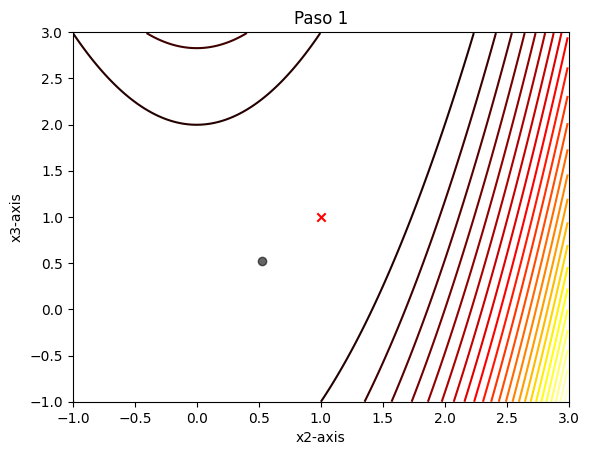

In [129]:
rosen_ev_dif_YZ_anim = get_pos_animation(rosen_ev_dif_pos_history_YZ,
                                        rosen,
                                        limits=[(-1,3),(-1,3)],
                                        labels = ['x2-axis', 'x3-axis'],
                                        levels=30,
                                        mark=(1,1)
                                        )

#rosen_ev_dif_YZ_anim.save('./RosenbrockGifs/rosenbrockEvDifYZ.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockEvDifYZ.gif')

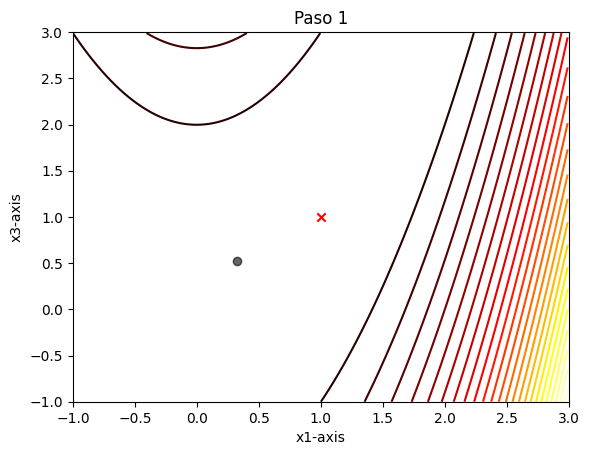

In [130]:
rosen_ev_dif_XZ_anim = get_pos_animation(rosen_ev_dif_pos_history_XZ,
                                        rosen,
                                        limits=[(-1,3),(-1,3)],
                                        labels = ['x1-axis', 'x3-axis'],
                                        levels=30,
                                        mark=(1,1)
                                        )

#rosen_ev_dif_XZ_anim.save('./RosenbrockGifs/rosenbrockEvDifXZ.gif', writer='imagemagick', fps=10)
#Image(url='./RosenbrockGifs/rosenbrockEvDifXZ.gif')

Solución al Traveling Salesman Problem

Importamos la base de datos de los municipios a visitar con sus coordenadas

In [131]:
df_ciudades = pd.read_csv("ciudades.csv")
df_ciudades

Cod Mun     Municipio  Cod Dep        Departamento    Latitud   Longitud
0     63001       Armenia       63             Quindio   4.533889 -75.681111
1      8001  Barranquilla        8           Atlantico  10.963889 -74.796389
2     11001   Bogota D.C.       25        Cundinamarca   4.600000 -74.083333
3     68001   Bucaramanga       68           Santander   7.129722 -73.125833
4     13001     Cartagena       13             Bolivar  10.399722 -75.514444
5     54001        Cucuta       54  Norte de Santander   7.883333 -72.505278
6     17001     Manizales       17              Caldas   5.070000 -75.520556
7      5001      Medellin        5           Antioquia   6.291389 -75.536111
8     23001      Monteria       23             Cordoba   8.757500 -75.890000
9     76520       Palmira       76     Valle del Cauca   3.539444 -76.303611
10    66001       Pereira       66           Risaralda   4.813333 -75.696111
11    52001         Pasto       52              Narino   1.214671 -77.278647
12     8758       Soledad        8           Atlantico  10.917222 -74.766667
13    76834         Tulua       76     Valle del Cauca   4.086667 -76.200000
14    20001    Valledupar       20               Cesar  10.476944 -73.250556

Procedemos a construír la matriz de costos. La entrada i,j de esta matriz contendrá el costo en pesos de ir de la ciudad i a la ciudad j. Éste, a su vez es la suma del salario por horas del vendedor, costo de los peajes y el costo del combustible en valores del 2023.

Costo hora del vendedor: El salario promedio de un conductor en colombia es de $6.827/hora [https://co.talent.com/salary?job=conductor#:~:text=¿Cuánto%20gana%20un%20Conductor%20en%20Colombia%3F&text=El%20salario%20conductor%20promedio%20en,con%20un%20ingreso%20de%20%2413.200.].

Costo de los peajes: Se estableció el costo de los peajes, el tiempo estimado de viaje y la distancia para cada par de ciudades.[https://viajaporcolombia.com/peajes/]

Costo del combustible: El recorrido se hará en un Mini Cooper 1.6, cuyo rendimiento es de 8,35 litros / 100 km [https://www.spritmonitor.de/es/detalle/125236.html?cdetail=1]. Además, el costo promedio de un litro de gasolina corriente en colombia es de $2.747,31/litro [https://es.globalpetrolprices.com/Colombia/gasoline_prices/#:~:text=El%20valor%20medio%20durante%20este,de%209%2C081.45%20(Colombian%20Peso).]. 

Importamos las tablas de tiempo de viaje, costo de los peajes y distancia entre ciudades.

In [132]:
df_tiempos = pd.read_csv("tiempos.csv")
df_tiempos

Tiempo viaje  Armenia  Barranquilla  Bogota D.C.  Bucaramanga  Cartagena  \
0        Armenia     0.00         18.05         5.61         9.91      17.05   
1   Barranquilla    18.05          0.00        17.95         9.17       2.03   
2    Bogota D.C.     5.61         17.95         0.00         7.60      19.17   
3    Bucaramanga     9.91          9.17         7.60         0.00      11.82   
4      Cartagena    17.05          2.03        19.17        11.82       0.00   
5         Cucuta    14.91         12.22        11.50         4.95      13.34   
6      Manizales     1.97         16.72         5.83         8.77      15.27   
7       Medellin     5.25         12.03         8.17         8.20      11.80   
8       Monteria    14.70          6.12        15.50        11.80       5.10   
9        Palmira     2.79         18.98         8.68        14.08      19.47   
10       Pereira     1.00         16.17         6.08         9.87      15.90   
11         Pasto     9.61         26.00        15.16        19.60      26.00   
12       Soledad    18.05          0.00        17.95         9.17       2.03   
13         Tulua     2.79         18.98         8.68        14.08      19.47   
14    Valledupar    14.77          5.58        12.82         7.15       6.92   

    Cucuta  Manizales  Medellin  Monteria  Palmira  Pereira  Pasto  Soledad  \
0    14.91       1.97      5.25     14.70     2.79     1.00   9.61    18.05   
1    12.22      16.72     12.03      6.12    18.98    16.17  26.00     0.00   
2    11.50       5.83      8.17     15.50     8.68     6.08  15.16    17.95   
3     4.95       8.77      8.20     11.80    14.08     9.87  19.60     9.17   
4    13.34      15.27     11.80      5.10    19.47    15.90  26.00     2.03   
5     0.00      13.45     11.38     14.47    17.15    14.52  24.00    12.22   
6    13.45       0.00      3.72     11.56     3.95     1.17   7.34    16.72   
7    11.38       3.72      0.00      7.42     7.75     4.08  14.48    12.03   
8    14.47      11.56      7.42      0.00    14.52    12.12  21.97     6.12   
9    17.15       3.95      7.75     14.52     0.00     4.13   7.27    18.98   
10   14.52       1.17      4.08     12.12     4.13     0.00   9.50    16.17   
11   24.00       7.34     14.48     21.97     7.27     9.50   0.00    26.00   
12   12.22      16.72     12.03      6.12    18.98    16.17  26.00     0.00   
13   17.15       3.95      7.75     14.52     0.00     4.13   7.27    18.98   
14    9.60      13.32     11.55      7.88    16.83    14.27  23.37     5.58   

    Tulua  Valledupar  
0    2.79       14.77  
1   18.98        5.58  
2    8.68       12.82  
3   14.08        7.15  
4   19.47        6.92  
5   17.15        9.60  
6    3.95       13.32  
7    7.75       11.55  
8   14.52        7.88  
9    0.00       16.83  
10   4.13       14.27  
11   7.27       23.37  
12  18.98        5.58  
13   0.00       16.83  
14  16.83        0.00

In [133]:
df_peajes = pd.read_csv("peajes.csv")
df_peajes

Costo Peajes   Armenia  Barranquilla  Bogota D.C.  Bucaramanga  Cartagena  \
0        Armenia       0.0      138800.0      55400.0      72600.0   164500.0   
1   Barranquilla  138800.0           0.0     142500.0      88100.0    33500.0   
2    Bogota D.C.   55400.0      142500.0          0.0      55100.0   130800.0   
3    Bucaramanga   72600.0       88100.0      55100.0          0.0    76400.0   
4      Cartagena  164500.0       33500.0     130800.0      76400.0        0.0   
5         Cucuta   87700.0       68700.0      42600.0      15100.0    57000.0   
6      Manizales   39700.0      117500.0      45400.0      51300.0   136400.0   
7       Medellin   57500.0      112400.0      74800.0      70100.0   107000.0   
8       Monteria  134200.0       41000.0     137900.0      86600.0    54500.0   
9        Palmira   49600.0      193300.0     104900.0     127100.0   200600.0   
10       Pereira   15300.0      141900.0      70700.0      75700.0   149200.0   
11         Pasto   78500.0      222200.0     133900.0     156000.0   229500.0   
12       Soledad  138800.0           0.0     142500.0      88100.0    33500.0   
13         Tulua   49600.0      193300.0     104900.0     127100.0   200600.0   
14    Valledupar  100000.0       49300.0     103700.0      49300.0    37600.0   

      Cucuta  Manizales  Medellin  Monteria   Palmira   Pereira     Pasto  \
0    87700.0    39700.0   57500.0  134200.0   49600.0   15300.0   78500.0   
1    68700.0   117500.0  112400.0   41000.0  193300.0  141900.0  222200.0   
2    42600.0    45400.0   74800.0  137900.0  104900.0   70700.0  133900.0   
3    15100.0    51300.0   70100.0   86600.0  127100.0   75700.0  156000.0   
4    57000.0   136400.0  107000.0   54500.0  200600.0  149200.0  229500.0   
5        0.0    66400.0   85200.0   67200.0  142200.0   90800.0  171100.0   
6    66400.0        0.0   29400.0  106100.0   75800.0   24400.0  104700.0   
7    85200.0    29400.0       0.0   90700.0   93600.0   42200.0  122500.0   
8    67200.0   106100.0   90700.0       0.0  170300.0  118900.0  199200.0   
9   142200.0    75800.0   93600.0  170300.0       0.0   51400.0   38600.0   
10   90800.0    24400.0   42200.0  118900.0   51400.0       0.0   80300.0   
11  171100.0   104700.0  122500.0  199200.0   38600.0   80300.0       0.0   
12   68700.0   117500.0  112400.0   41000.0  193300.0  141900.0  222200.0   
13  142200.0    75800.0   93600.0  170300.0       0.0   51400.0   38600.0   
14   29900.0    78700.0   97500.0   47800.0  154500.0  103100.0  183400.0   

     Soledad     Tulua  Valledupar  
0   138800.0   49600.0    100000.0  
1        0.0  193300.0     49300.0  
2   142500.0  104900.0    103700.0  
3    88100.0  127100.0     49300.0  
4    33500.0  200600.0     37600.0  
5    68700.0  142200.0     29900.0  
6   117500.0   75800.0     78700.0  
7   112400.0   93600.0     97500.0  
8    41000.0  170300.0     47800.0  
9   193300.0       0.0    154500.0  
10  141900.0   51400.0    103100.0  
11  222200.0   38600.0    183400.0  
12       0.0  193300.0     49300.0  
13  193300.0       0.0    154500.0  
14   49300.0  154500.0         0.0

In [134]:
df_distancias = pd.read_csv("distancias.csv")
df_distancias

Distancia   Armenia  Barranquilla  Bogota D.C.  Bucaramanga  Cartagena  \
0        Armenia       0.0         968.0        282.0        594.0      903.0   
1   Barranquilla     968.0           0.0        979.0        585.0      120.0   
2    Bogota D.C.     282.0         979.0          0.0        407.0     1050.0   
3    Bucaramanga     594.0         585.0        407.0          0.0      650.0   
4      Cartagena     903.0         120.0       1050.0        650.0        0.0   
5         Cucuta     804.0         657.0        557.0        198.0      731.0   
6      Manizales      96.0         894.0        302.0        508.0      831.0   
7       Medellin     268.0         702.0        443.0        404.0      640.0   
8       Monteria     663.0         353.0        832.0        717.0      276.0   
9        Palmira     180.0        1252.0        464.0        769.0     1063.0   
10       Pereira      48.0        1050.0        318.0        559.0      849.0   
11         Pasto     559.0        1631.0        845.0       1140.0     1434.0   
12       Soledad  138800.0           0.0        979.0        585.0      120.0   
13         Tulua   49600.0      193300.0        464.0        769.0     1063.0   
14    Valledupar     949.0         295.0        867.0        449.0      365.0   

    Cucuta  Manizales  Medellin  Monteria  Palmira  Pereira   Pasto  Soledad  \
0    804.0       96.0     268.0     663.0    180.0     48.0   559.0    968.0   
1    657.0      894.0     702.0     353.0   1252.0   1050.0  1631.0      0.0   
2    557.0      302.0     443.0     832.0    464.0    318.0   845.0    979.0   
3    198.0      508.0     404.0     717.0    769.0    559.0  1140.0    585.0   
4    731.0      831.0     640.0     276.0   1063.0    849.0  1434.0    120.0   
5      0.0      694.0     598.0     795.0    954.0    747.0  1329.0    657.0   
6    694.0        0.0     194.0     600.0    258.0     54.0   424.0    894.0   
7    598.0      194.0       0.0     405.0    425.0    215.0   802.0    702.0   
8    795.0      600.0     405.0       0.0    825.0    621.0  1203.0    353.0   
9    954.0      258.0     425.0     825.0      0.0    210.0   388.0   1252.0   
10   747.0       54.0     215.0     621.0    210.0      0.0   582.0   1050.0   
11  1329.0      424.0     802.0    1203.0    388.0    582.0     0.0   1631.0   
12   657.0      894.0     702.0     353.0   1252.0   1050.0  1631.0      0.0   
13   954.0      258.0     425.0     825.0      0.0    210.0   388.0   1252.0   
14   525.0      860.0     745.0     433.0   1116.0    913.0  1493.0    295.0   

     Tulua  Valledupar  
0    180.0       949.0  
1   1252.0       295.0  
2    464.0       867.0  
3    769.0       449.0  
4   1063.0       365.0  
5    954.0       525.0  
6    258.0       860.0  
7    425.0       745.0  
8    825.0       433.0  
9      0.0      1116.0  
10   210.0       913.0  
11   388.0      1493.0  
12  1252.0       295.0  
13     0.0      1116.0  
14  1116.0         0.0

Calculamos la tabla de costos del vendedor con la tabla de tiempos y su pago por hora.

In [135]:
pago_hora = 6827
df_costo_vendedor = df_tiempos.applymap(lambda x: x*pago_hora if not isinstance(x, str) else x )
df_costo_vendedor

Tiempo viaje    Armenia  Barranquilla  Bogota D.C.  Bucaramanga  \
0        Armenia       0.00     123227.35     38299.47     67655.57   
1   Barranquilla  123227.35          0.00    122544.65     62603.59   
2    Bogota D.C.   38299.47     122544.65         0.00     51885.20   
3    Bucaramanga   67655.57      62603.59     51885.20         0.00   
4      Cartagena  116400.35      13858.81    130873.59     80695.14   
5         Cucuta  101790.57      83425.94     78510.50     33793.65   
6      Manizales   13449.19     114147.44     39801.41     59872.79   
7       Medellin   35841.75      82128.81     55776.59     55981.40   
8       Monteria  100356.90      41781.24    105818.50     80558.60   
9        Palmira   19047.33     129576.46     59258.36     96124.16   
10       Pereira    6827.00     110392.59     41508.16     67382.49   
11         Pasto   65607.47     177502.00    103497.32    133809.20   
12       Soledad  123227.35          0.00    122544.65     62603.59   
13         Tulua   19047.33     129576.46     59258.36     96124.16   
14    Valledupar  100834.79      38094.66     87522.14     48813.05   

    Cartagena     Cucuta  Manizales  Medellin   Monteria    Palmira  \
0   116400.35  101790.57   13449.19  35841.75  100356.90   19047.33   
1    13858.81   83425.94  114147.44  82128.81   41781.24  129576.46   
2   130873.59   78510.50   39801.41  55776.59  105818.50   59258.36   
3    80695.14   33793.65   59872.79  55981.40   80558.60   96124.16   
4        0.00   91072.18  104248.29  80558.60   34817.70  132921.69   
5    91072.18       0.00   91823.15  77691.26   98786.69  117083.05   
6   104248.29   91823.15       0.00  25396.44   78920.12   26966.65   
7    80558.60   77691.26   25396.44      0.00   50656.34   52909.25   
8    34817.70   98786.69   78920.12  50656.34       0.00   99128.04   
9   132921.69  117083.05   26966.65  52909.25   99128.04       0.00   
10  108549.30   99128.04    7987.59  27854.16   82743.24   28195.51   
11  177502.00  163848.00   50110.18  98854.96  149989.19   49632.29   
12   13858.81   83425.94  114147.44  82128.81   41781.24  129576.46   
13  132921.69  117083.05   26966.65  52909.25   99128.04       0.00   
14   47242.84   65539.20   90935.64  78851.85   53796.76  114898.41   

      Pereira      Pasto    Soledad      Tulua  Valledupar  
0     6827.00   65607.47  123227.35   19047.33   100834.79  
1   110392.59  177502.00       0.00  129576.46    38094.66  
2    41508.16  103497.32  122544.65   59258.36    87522.14  
3    67382.49  133809.20   62603.59   96124.16    48813.05  
4   108549.30  177502.00   13858.81  132921.69    47242.84  
5    99128.04  163848.00   83425.94  117083.05    65539.20  
6     7987.59   50110.18  114147.44   26966.65    90935.64  
7    27854.16   98854.96   82128.81   52909.25    78851.85  
8    82743.24  149989.19   41781.24   99128.04    53796.76  
9    28195.51   49632.29  129576.46       0.00   114898.41  
10       0.00   64856.50  110392.59   28195.51    97421.29  
11   64856.50       0.00  177502.00   49632.29   159546.99  
12  110392.59  177502.00       0.00  129576.46    38094.66  
13   28195.51   49632.29  129576.46       0.00   114898.41  
14   97421.29  159546.99   38094.66  114898.41        0.00

Calculamos la tabla de costos de combustible

In [136]:
consumo = 8.35/100 #litro/km
precio_gasolina = 2747.31 #$/litro
costo_kilometro = precio_gasolina * consumo # $/km
df_costo_combustible = df_distancias.applymap(lambda x: float(x)*costo_kilometro if not isinstance(x, str) else x )
df_costo_combustible

Distancia       Armenia  Barranquilla    Bogota D.C.    Bucaramanga  \
0        Armenia  0.000000e+00  2.220596e+05   64690.908570  136263.828690   
1   Barranquilla  2.220596e+05  0.000000e+00  224582.976915  134199.225225   
2    Bogota D.C.  6.469091e+04  2.245830e+05       0.000000   93365.956695   
3    Bucaramanga  1.362638e+05  1.341992e+05   93365.956695       0.000000   
4      Cartagena  2.071485e+05  2.752805e+04  240870.404250  149110.250250   
5         Cucuta  1.844379e+05  1.507161e+05  127776.014445   45421.276230   
6      Manizales  2.202244e+04  2.050839e+05   69278.916270  116535.395580   
7       Medellin  6.147930e+04  1.610391e+05  101624.370555   92677.755540   
8       Monteria  1.520925e+05  8.097834e+04  190861.120320  164480.076045   
9        Palmira  4.129207e+04  2.872093e+05  106441.778640  176408.896065   
10       Pereira  1.101122e+04  2.408704e+05   72949.322430  128234.815215   
11         Pasto  1.282348e+05  3.741520e+05  193843.325325  261516.438900   
12       Soledad  3.184077e+07  0.000000e+00  224582.976915  134199.225225   
13         Tulua  1.137826e+07  4.434309e+07  106441.778640  176408.896065   
14    Valledupar  2.177010e+05  6.767311e+04  198890.133795  103000.772865   

        Cartagena         Cucuta      Manizales       Medellin       Monteria  \
0   207148.547655  184437.909540   22022.436960   61479.303180  152092.455255   
1    27528.046200  150716.052945  205083.944190  161039.070270   80978.335905   
2   240870.404250  127776.014445   69278.916270  101624.370555  190861.120320   
3   149110.250250   45421.276230  116535.395580   92677.755540  164480.076045   
4        0.000000  167691.681435  190631.719935  146816.246400   63314.506260   
5   167691.681435       0.000000  159203.867190  137181.430230  182373.306075   
6   190631.719935  159203.867190       0.000000   44503.674690  137640.231000   
7   146816.246400  137181.430230   44503.674690       0.000000   92907.155925   
8    63314.506260  182373.306075  137640.231000   92907.155925       0.000000   
9   243852.609255  218847.967290   59185.299330   97495.163625  189255.317625   
10  194760.926865  171362.087595   12387.620790   49321.082775  142457.639085   
11  328960.152090  304873.111665   97265.763240  183979.108770  275968.663155   
12   27528.046200  150716.052945  205083.944190  161039.070270   80978.335905   
13  243852.609255  218847.967290   59185.299330   97495.163625  189255.317625   
14   83731.140525  120435.202125  197284.331100  170903.286825   99330.366705   

          Palmira        Pereira          Pasto        Soledad          Tulua  \
0    41292.069300   11011.218480  128234.815215  222059.572680   41292.069300   
1   287209.282020  240870.404250  374152.027935       0.000000  287209.282020   
2   106441.778640   72949.322430  193843.325325  224582.976915  106441.778640   
3   176408.896065  128234.815215  261516.438900  134199.225225  176408.896065   
4   243852.609255  194760.926865  328960.152090   27528.046200  243852.609255   
5   218847.967290  171362.087595  304873.111665  150716.052945  218847.967290   
6    59185.299330   12387.620790   97265.763240  205083.944190   59185.299330   
7    97495.163625   49321.082775  183979.108770  161039.070270   97495.163625   
8   189255.317625  142457.639085  275968.663155   80978.335905  189255.317625   
9        0.000000   48174.080850   89007.349380  287209.282020       0.000000   
10   48174.080850       0.000000  133511.024070  240870.404250   48174.080850   
11   89007.349380  133511.024070       0.000000  374152.027935   89007.349380   
12  287209.282020  240870.404250  374152.027935       0.000000  287209.282020   
13       0.000000   48174.080850   89007.349380  287209.282020       0.000000   
14  256010.829660  209442.551505  342494.774805   67673.113575  256010.829660   

       Valledupar  
0   217700.965365  
1    67673.113575  
2   198890.133795  
3   103000.772865  
4    83731.140525  
5   120435.202125  
6   197284.331100  
7   

Con estas matrices podemos calcular la matriz de costos totales de viajar entre dos ciudades

In [137]:
df_costo_total = (df_costo_combustible.drop("Distancia", axis=1)+
                    df_costo_vendedor.drop("Tiempo viaje", axis=1)+
                    df_peajes.drop("Costo Peajes", axis=1))
df_costo_total = df_costo_total.set_index(pd.Series(['Armenia', 'Barranquilla', 'Bogota D.C.', 
                                                        'Bucaramanga', 'Cartagena', 'Cucuta', 
                                                        'Manizales', 'Medellin', 'Monteria', 
                                                        'Palmira', 'Pereira', 'Pasto', 'Soledad', 
                                                        'Tulua', 'Valledupar']))
df_costo_total

Armenia  Barranquilla    Bogota D.C.    Bucaramanga  \
Armenia       0.000000e+00  4.840869e+05  158390.378570  276519.398690   
Barranquilla  4.840869e+05  0.000000e+00  489627.626915  284902.815225   
Bogota D.C.   1.583904e+05  4.896276e+05       0.000000  200351.156695   
Bucaramanga   2.765194e+05  2.849028e+05  200351.156695       0.000000   
Cartagena     4.880489e+05  7.488686e+04  502543.994250  306205.390250   
Cucuta        3.739285e+05  3.028420e+05  248886.514445   94314.926230   
Manizales     7.517163e+04  4.367314e+05  154480.326270  227708.185580   
Medellin      1.548211e+05  3.555679e+05  232200.960555  218759.155540   
Monteria      3.866494e+05  1.637596e+05  434579.620320  331638.676045   
Palmira       1.099394e+05  6.100857e+05  270600.138640  399633.056065   
Pereira       3.313822e+04  4.931630e+05  185157.482430  271317.305215   
Pasto         2.723423e+05  7.738540e+05  431240.645325  551325.638900   
Soledad       3.210280e+07  0.000000e+00  489627.626915  284902.815225   
Tulua         1.144691e+07  4.466597e+07  270600.138640  399633.056065   
Valledupar    4.185358e+05  1.550678e+05  390112.273795  201113.822865   

                  Cartagena         Cucuta      Manizales       Medellin  \
Armenia       488048.897655  373928.479540   75171.626960  154821.053180   
Barranquilla   74886.856200  302841.992945  436731.384190  355567.880270   
Bogota D.C.   502543.994250  248886.514445  154480.326270  232200.960555   
Bucaramanga   306205.390250   94314.926230  227708.185580  218759.155540   
Cartagena          0.000000  315763.861435  431280.009935  334374.846400   
Cucuta        315763.861435       0.000000  317427.017190  300072.690230   
Manizales     431280.009935  317427.017190       0.000000   99300.114690   
Medellin      334374.846400  300072.690230   99300.114690       0.000000   
Monteria      152632.206260  348359.996075  322660.351000  234263.495925   
Palmira       577374.299255  478131.017290  161951.949330  244004.413625   
Pereira       452510.226865  361290.127595   44775.210790  119375.242775   
Pasto         735962.152090  639821.111665  252075.943240  405334.068770   
Soledad        74886.856200  302841.992945  436731.384190  355567.880270   
Tulua         577374.299255  478131.017290  161951.949330  244004.413625   
Valledupar    168573.980525  215874.402125  366919.971100  347255.136825   

                   Monteria        Palmira        Pereira          Pasto  \
Armenia       386649.355255  109939.399300   33138.218480  272342.285215   
Barranquilla  163759.575905  610085.742020  493162.994250  773854.027935   
Bogota D.C.   434579.620320  270600.138640  185157.482430  431240.645325   
Bucaramanga   331638.676045  399633.056065  271317.305215  551325.638900   
Cartagena     152632.206260  577374.299255  452510.226865  735962.152090   
Cucuta        348359.996075  478131.017290  361290.127595  639821.111665   
Manizales     322660.351000  161951.949330   44775.210790  252075.943240   
Medellin      234263.495925  244004.413625  119375.242775  405334.068770   
Monteria           0.000000  458683.357625  344100.879085  625157.853155   
Palmira       458683.357625       0.000000  127769.590850  177239.639380   
Pereira       344100.879085  127769.590850       0.000000  278667.524070   
Pasto         625157.853155  177239.639380  278667.524070       0.000000   
Soledad       163759.575905  610085.742020  493162.994250  773854.027935   
Tulua         458683.357625       0.000000  127769.590850  177239.639380   
Valledupar    200927.126705  525409.239660  409963.841505  685441.764805   

                    Soledad          Tulua     Valledupar  
Armenia       484086.922680  109939.399300  418535.755365  
Barranquilla       0.000000  610085.742020  155067.773575  
Bogota D.C.   489627.626915  270600.138640  390112.273795  
Bucaramanga   284902.815225  399633.056065  201113.822865  
Cartagena      74886.856200  577374.299255  168573.980525  
Cucuta        302841.992945  478131.0172

Optimización utilizando algoritmos genéticos y GIF del proceso

Se utilizó el siguiente repositorio como guía para la implementación de los algoritmos genéticos: https://github.com/manpreet1130/Travelling-Salesman-Problem-with-Genetic-Algorithm

In [138]:
!pip install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [139]:
import random
import pygame
import sys
import math
import time
import os
os.environ['SDL_VIDEODRIVER']='dummy'
pygame.display.set_mode((640,480))
pygame.init()

totalNum = 15 #Número de municipios a visitar
popNum = 5000 #Población del algoritmo
font = pygame.font.Font("freesansbold.ttf", 15)
WIDTH = 600
HEIGHT = 600
PERCENTAGE = 0.5 #Porcentage de la población actual que pasa a la siguiente generación

screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Problema del Vendedor Viajero")

class City:
    def __init__(self, nombre, x, y, i):
        self.nombre = nombre
        self.x = x
        self.y = y
        self.num = i
        self.text = font.render(str(self.num), False, (255, 255, 255))

    def display(self):
        pygame.draw.circle(screen, (255, 255, 255), (self.x, self.y), 5)

#Inicializamos las ciudades
nombres = list(df_ciudades.Municipio)
X = list(df_ciudades.Longitud)
Y = list(df_ciudades.Latitud)
cities = [City(nombres[i], X[i], Y[i], i) for i in range(totalNum)] 

class Route:
    def __init__(self):
        self.distance = 0
        self.cityPath = random.sample(list(range(totalNum)), totalNum)

    def display(self):
        for i, cityNum in enumerate(self.cityPath):
            pygame.draw.line(screen, (0, 0, 255), (cities[self.cityPath[i]].x, cities[self.cityPath[i]].y), \
                            (cities[self.cityPath[i-1]].x, cities[self.cityPath[i-1]].y))
    #Aquí tenemos que incorporar la matriz de costos calculada
    def calcDistance(self):
        distance = 0
        for i, cityNum in enumerate(self.cityPath):
            if i != 0:
                distance += df_costo_total[cities[self.cityPath[i-1]].nombre][cities[self.cityPath[i]].nombre]
        self.distance = distance
        return distance

population = [Route() for i in range(popNum)]

#Función que ordena la población con base en la función de ajuste, o sea, el costo de la ruta
def sortPop():
    global population
    population.sort(key = lambda x: x.distance, reverse = False)
    return

#Función que toma el top PERCENTAGE de la población para una generación particular y produce una 
#nueva población reemplazando los miembros no esenciales con nuevos.return
def crossover():
    global population
    updatedPop = []
    updatedPop.extend(population[: int(popNum*PERCENTAGE)])

    for i in range(popNum - len(updatedPop)):
        index1 = random.randint(0, len(updatedPop) - 1)
        index2 = random.randint(0, len(updatedPop) - 1)
        while index1 == index2:
            index2 = random.randint(0, len(updatedPop) - 1)
        parent1 = updatedPop[index1]
        parent2 = updatedPop[index2]
        p = random.randint(0, totalNum - 1)
        child = Route()
        child.cityPath = parent1.cityPath[:p]
        notInChild = [x for x in parent2.cityPath if not x in child.cityPath]
        child.cityPath.extend(notInChild)
        updatedPop.append(child)
    population = updatedPop
    return

def main():
    global population
    running = True
    counter = 0

    best = random.choice(population)

    minDistance = best.calcDistance()
    '''
    Print the coordinates of the randomly generated points
    
    for city in cities:
            print(city.x, city.y)
    '''
    clock = pygame.time.Clock()
    while True:
        best.display()
        if counter >= popNum - 1:
            break
        #print(counter)
        clock.tick(60)
        pygame.display.update()
        screen.fill((0, 0, 0))
        for city in cities:
            city.display()
            screen.blit(city.text, (city.x - 20, city.y - 20))
        for element in population:
            element.calcDistance()

        sortPop()
        crossover()
        
        for element in population:
            if element.distance < minDistance:
                minDistance = element.calcDistance()
                best = element
            elif element.distance == minDistance:
                counter += 1
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
                pygame.quit()
                sys.exit()
    print("El costo mínimo es : ${}".format(round(minDistance)))
    print("Un camino viable : {}".format([cities[i].nombre for  i in best.cityPath]))
    best.display()
    pygame.display.update()
    time.sleep(5)

if __name__ == "__main__":
    main()

pygame 2.3.0 (SDL 2.24.2, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

Ejecutando el código localmente con unas cuantas modificaciones, pudimos generar el  gif  "gifGA.gif" de la evolución de los trayectos por colombia.

Optimización utilizando Colonia de Hormigas y GIF del proceso

Se utilizó el siguiente repositorio como guía para la implementación de la colonia de hormigas: https://github.com/ppoffice/ant-colony-tsp

In [0]:
import random
import math
import operator
import matplotlib.pyplot as plt
import pandas as pd

k = 1

class Graph(object):
    def __init__(self, cost_matrix: list, rank: int):
        """
        :param cost_matrix:
        :param rank: rank of the cost matrix
        """
        self.matrix = cost_matrix
        self.rank = rank
        # noinspection PyUnusedLocal
        self.pheromone = [[1 / (rank * rank) for j in range(rank)] for i in range(rank)]


class ACO(object):
    def __init__(self, ant_count: int, generations: int, alpha: float, beta: float, rho: float, q: int,
                 strategy: int):
        """
        :param ant_count:
        :param generations:
        :param alpha: relative importance of pheromone
        :param beta: relative importance of heuristic information
        :param rho: pheromone residual coefficient
        :param q: pheromone intensity
        :param strategy: pheromone update strategy. 0 - ant-cycle, 1 - ant-quality, 2 - ant-density
        """
        self.Q = q
        self.rho = rho
        self.beta = beta
        self.alpha = alpha
        self.ant_count = ant_count
        self.generations = generations
        self.update_strategy = strategy

    def _update_pheromone(self, graph: Graph, ants: list):
        for i, row in enumerate(graph.pheromone):
            for j, col in enumerate(row):
                graph.pheromone[i][j] *= self.rho
                for ant in ants:
                    graph.pheromone[i][j] += ant.pheromone_delta[i][j]

    # noinspection PyProtectedMember
    def solve(self, graph: Graph):
        """
        :param graph:
        """
        best_cost = float('inf')
        best_solutions = []
        for gen in range(self.generations):
            # noinspection PyUnusedLocal
            ants = [_Ant(self, graph) for i in range(self.ant_count)]
            for ant in ants:
                for i in range(graph.rank - 1):
                    ant._select_next()
                ant.total_cost += graph.matrix[ant.tabu[-1]][ant.tabu[0]]
                if ant.total_cost < best_cost:
                    best_cost = ant.total_cost
                    best_solutions.append(ant.tabu)
                # update pheromone
                ant._update_pheromone_delta()
            self._update_pheromone(graph, ants)
            # print('generation #{}, best cost: {}, path: {}'.format(gen, best_cost, best_solution))
        return best_solutions, best_cost


class _Ant(object):
    def __init__(self, aco: ACO, graph: Graph):
        self.colony = aco
        self.graph = graph
        self.total_cost = 0.0
        self.tabu = []  # tabu list
        self.pheromone_delta = []  # the local increase of pheromone
        self.allowed = [i for i in range(graph.rank)]  # nodes which are allowed for the next selection
        self.eta = [[0 if i == j else 1 / graph.matrix[i][j] for j in range(graph.rank)] for i in
                    range(graph.rank)]  # heuristic information
        start = random.randint(0, graph.rank - 1)  # start from any node
        self.tabu.append(start)
        self.current = start
        self.allowed.remove(start)

    def _select_next(self):
        denominator = 0
        for i in self.allowed:
            denominator += self.graph.pheromone[self.current][i] ** self.colony.alpha * self.eta[self.current][
                                                                                            i] ** self.colony.beta
        # noinspection PyUnusedLocal
        probabilities = [0 for i in range(self.graph.rank)]  # probabilities for moving to a node in the next step
        for i in range(self.graph.rank):
            try:
                self.allowed.index(i)  # test if allowed list contains i
                probabilities[i] = self.graph.pheromone[self.current][i] ** self.colony.alpha * \
                    self.eta[self.current][i] ** self.colony.beta / denominator
            except ValueError:
                pass  # do nothing
        # select next node by probability roulette
        selected = 0
        rand = random.random()
        for i, probability in enumerate(probabilities):
            rand -= probability
            if rand <= 0:
                selected = i
                break
        self.allowed.remove(selected)
        self.tabu.append(selected)
        self.total_cost += self.graph.matrix[self.current][selected]
        self.current = selected

    # noinspection PyUnusedLocal
    def _update_pheromone_delta(self):
        self.pheromone_delta = [[0 for j in range(self.graph.rank)] for i in range(self.graph.rank)]
        for _ in range(1, len(self.tabu)):
            i = self.tabu[_ - 1]
            j = self.tabu[_]
            if self.colony.update_strategy == 1:  # ant-quality system
                self.pheromone_delta[i][j] = self.colony.Q
            elif self.colony.update_strategy == 2:  # ant-density system
                # noinspection PyTypeChecker
                self.pheromone_delta[i][j] = self.colony.Q / self.graph.matrix[i][j]
            else:  # ant-cycle system
                self.pheromone_delta[i][j] = self.colony.Q / self.total_cost

def distance(city1: dict, city2: dict):
    return math.sqrt((city1['x'] - city2['x']) ** 2 + (city1['y'] - city2['y']) ** 2)

def plot(points, path: list):
    global k
    background = plt.imread('mapa-colombia.png')
    plt.imshow(background, extent=[0, 740, 0, 740])
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    # noinspection PyUnusedLocal
    #y = list(map(operator.sub, [max(y) for i in range(len(points))], y))
    plt.plot(x, y, 'co')

    for _ in range(1, len(path)):
        i = path[_ - 1]
        j = path[_]
        # noinspection PyUnresolvedReferences
        plt.arrow(x[i], y[i], x[j] - x[i], y[j] - y[i], color='r', length_includes_head=True)

    # noinspection PyTypeChecker
    plt.xlim(0, 740)
    # noinspection PyTypeChecker
    plt.ylim(0, 740)
    plt.show()



def main():
    nombres = list(df_ciudades.Municipio)
    X = [266, 297, 330, 367, 274, 392, 270, 267, 261, 240, 262, 196, 295, 247, 362]
    Y = [378, 648, 389, 485, 620, 520, 406, 457, 553, 343, 394, 248, 631, 364, 626]
    cities = []
    points = []
    i = 0
    for x, y in zip(X, Y):
        cities.append(dict(index=i, x=x, y=y))
        points.append((int(x), int(y)))
        i += 1
    cost_matrix = df_costo_total.values.tolist()
    rank = len(cities)
    for i in range(rank):
        for j in range(rank):
            if i != j and cost_matrix[i][j] == 0:
                cost_matrix[i][j] = 20000
    aco = ACO(100, 300, 1.0, 1.0, 0.1, 10, 2)
    graph = Graph(cost_matrix, rank)
    paths, cost = aco.solve(graph)
    print('costo: ${}, recorrido: {}'.format(round(cost), [nombres[i] for i in paths[-1]]))
    plot(points, paths[-1])

main()

Ejecutando el código localmente con unas cuantas modificaciones, pudimos generar el  gif  "gifAC.gif" de la evolución de los trayectos por colombia de 100 hormigas.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eafd788b-3e63-4104-b546-f06f4cef74a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>